# Reproducible research project
Authors:
Zuzanna Miazio
Filip Szymański
Kacper Sokołowski

In [164]:
# Imports
import numpy as np 
import pandas as pd 
from pathlib import Path
import os
import warnings

from importlib import reload 
import visualisation_kit
reload(visualisation_kit)
from visualisation_kit import *

# Settings
warnings.filterwarnings('ignore')
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
pd.set_option('display.max_columns', 100)
sns.set_style("darkgrid")

In [165]:
data_path = Path.cwd() / "data/bank_data_prediction_task.csv"
df = pd.read_csv(data_path)

In [166]:
df_raw = df.copy()

### Initial data inspection

In [167]:
df.sample(10).head(10)

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,test_control_flag
41101,41102,60,retired,married,professional.course,no,no,yes,NaN,NaN,NaN,NaN,NaN,999,1,failure,-1.10,94.60,-49.50,1.04,4963.60,no,control group
37546,37547,54,management,married,university.degree,no,no,no,NaN,NaN,NaN,NaN,NaN,999,1,failure,-1.80,92.89,-46.20,1.25,5099.10,no,control group
4335,4336,27,technician,married,university.degree,no,yes,yes,telephone,jun,wed,55.00,10.00,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,no,campaign group
27684,27685,39,technician,married,professional.course,no,yes,no,NaN,NaN,NaN,NaN,NaN,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no,control group
16755,16756,45,management,married,university.degree,no,yes,no,NaN,NaN,NaN,NaN,NaN,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,control group
21878,21879,60,retired,married,professional.course,no,yes,no,NaN,NaN,NaN,NaN,NaN,999,0,nonexistent,1.40,94.47,-41.80,4.87,5228.10,no,control group
29807,29808,47,services,married,basic.9y,no,unknown,unknown,NaN,NaN,NaN,NaN,NaN,999,0,nonexistent,1.40,93.44,-36.10,4.96,5228.10,no,control group
30002,30003,49,unemployed,married,high.school,unknown,yes,no,NaN,NaN,NaN,NaN,NaN,999,0,nonexistent,1.40,93.44,-36.10,4.96,5228.10,no,control group
31765,31766,32,entrepreneur,married,basic.6y,no,yes,yes,NaN,NaN,NaN,NaN,NaN,999,0,nonexistent,-0.10,93.20,-42.00,4.12,5195.80,no,control group
8453,8454,32,admin.,married,university.degree,no,no,no,cellular,aug,mon,251.00,2.00,999,0,nonexistent,1.40,93.44,-36.10,4.96,5228.10,no,campaign group


### renaming dataset columns 

In [168]:
df = df.rename(columns={df.columns[0]: 'client_id'})

In [169]:
colnames_to_change = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "nr.employed"]
dict = {}

for col in colnames_to_change:
    new = col.replace(".", "_")
    dict[col] = new
    
df = df.rename(columns = dict)

### Data description


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   client_id          41188 non-null  int64  
 1   age                41188 non-null  int64  
 2   job                41188 non-null  object 
 3   marital            41188 non-null  object 
 4   education          41188 non-null  object 
 5   default            41188 non-null  object 
 6   housing            41188 non-null  object 
 7   loan               41188 non-null  object 
 8   contact            16476 non-null  object 
 9   month              16476 non-null  object 
 10  day_of_week        16476 non-null  object 
 11  duration           16476 non-null  float64
 12  campaign           16476 non-null  float64
 13  pdays              41188 non-null  int64  
 14  previous           41188 non-null  int64  
 15  poutcome           41188 non-null  object 
 16  emp_var_rate       411

In [171]:
df['test_control_flag'].value_counts()

control group     24712
campaign group    16476
Name: test_control_flag, dtype: int64

In [172]:
df['cons_price_idx'].value_counts()

93.99    7719
93.92    6643
92.89    5762
93.44    5147
94.47    4353
93.20    3588
93.08    2440
92.20     764
92.96     709
92.43     444
92.65     356
94.22     311
94.20     301
92.84     281
92.38     265
93.37     260
94.03     231
94.06     227
93.88     211
94.60     204
92.47     176
92.71     172
93.75     172
94.77     127
93.80      66
92.76       9
Name: cons_price_idx, dtype: int64

In [173]:
null_cons_price_idx = df[df['cons_price_idx'].isnull()]
null_cons_price_idx['test_control_flag'].value_counts()

control group    250
Name: test_control_flag, dtype: int64

In [174]:
df['cons_price_idx'].fillna(df['cons_price_idx'].median(), inplace=True)

In [175]:
df.describe()

,client_id,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00,41188.00,16476.00,16476.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,20594.50,40.02,259.66,2.55,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,11890.10,10.42,260.66,2.70,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,1.00,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,10297.75,32.00,103.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,20594.50,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,30891.25,47.00,321.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,41188.00,98.00,4918.00,43.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


In [176]:
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y,test_control_flag
count,41188,41188,41188,41188,41188,41188,16476,16476,16476,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no,control group
freq,10422,24928,12168,32588,21576,33950,10481,5497,3522,35563,36020,24712


In [177]:
df['test_control_flag'].value_counts()

control group     24712
campaign group    16476
Name: test_control_flag, dtype: int64

In [178]:
df['pdays'].replace(999, np.nan, inplace = True)

In [179]:
temp_df = df.drop(['client_id'], axis=1)
temp_df.duplicated().sum()


2306

In [180]:
duplicates = temp_df[temp_df.duplicated(keep=False)]
display(duplicates)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,test_control_flag
496,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124.00,1.00,NaN,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,campaign group
497,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124.00,1.00,NaN,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,campaign group
10057,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123.00,2.00,NaN,0,nonexistent,-0.10,93.20,-42.00,4.15,5195.80,no,campaign group
10069,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123.00,2.00,NaN,0,nonexistent,-0.10,93.20,-42.00,4.15,5195.80,no,campaign group
16480,59,admin.,married,professional.course,no,no,no,NaN,NaN,NaN,NaN,NaN,NaN,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,control group
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40713,41,entrepreneur,married,university.degree,no,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,0,nonexistent,-1.70,94.03,-38.30,0.90,4991.60,yes,control group
40912,33,technician,married,university.degree,no,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,1,failure,-1.10,94.20,-37.50,0.88,4963.60,no,control group
40916,33,technician,married,university.degree,no,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,1,failure,-1.10,94.20,-37.50,0.88,4963.60,no,control group
40954,35,technician,married,professional.course,no,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,2,failure,-1.10,94.20,-37.50,0.88,4963.60,no,control group


In [181]:
duplicates['test_control_flag'].value_counts()

control group     4142
campaign group       4
Name: test_control_flag, dtype: int64

In [182]:
duplicates[duplicates['test_control_flag'] == 'campaign group']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,test_control_flag
496,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124.00,1.00,NaN,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,campaign group
497,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124.00,1.00,NaN,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no,campaign group
10057,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123.00,2.00,NaN,0,nonexistent,-0.10,93.20,-42.00,4.15,5195.80,no,campaign group
10069,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123.00,2.00,NaN,0,nonexistent,-0.10,93.20,-42.00,4.15,5195.80,no,campaign group


In [183]:
columns_to_check = df.columns[df.columns != 'client_id']
df.drop_duplicates(subset = columns_to_check, keep='first', inplace=True)

In [184]:
df.duplicated().sum()

0

## Visualisations

In [185]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=[np.object_]).columns.tolist()

### Distributions of categorical variables

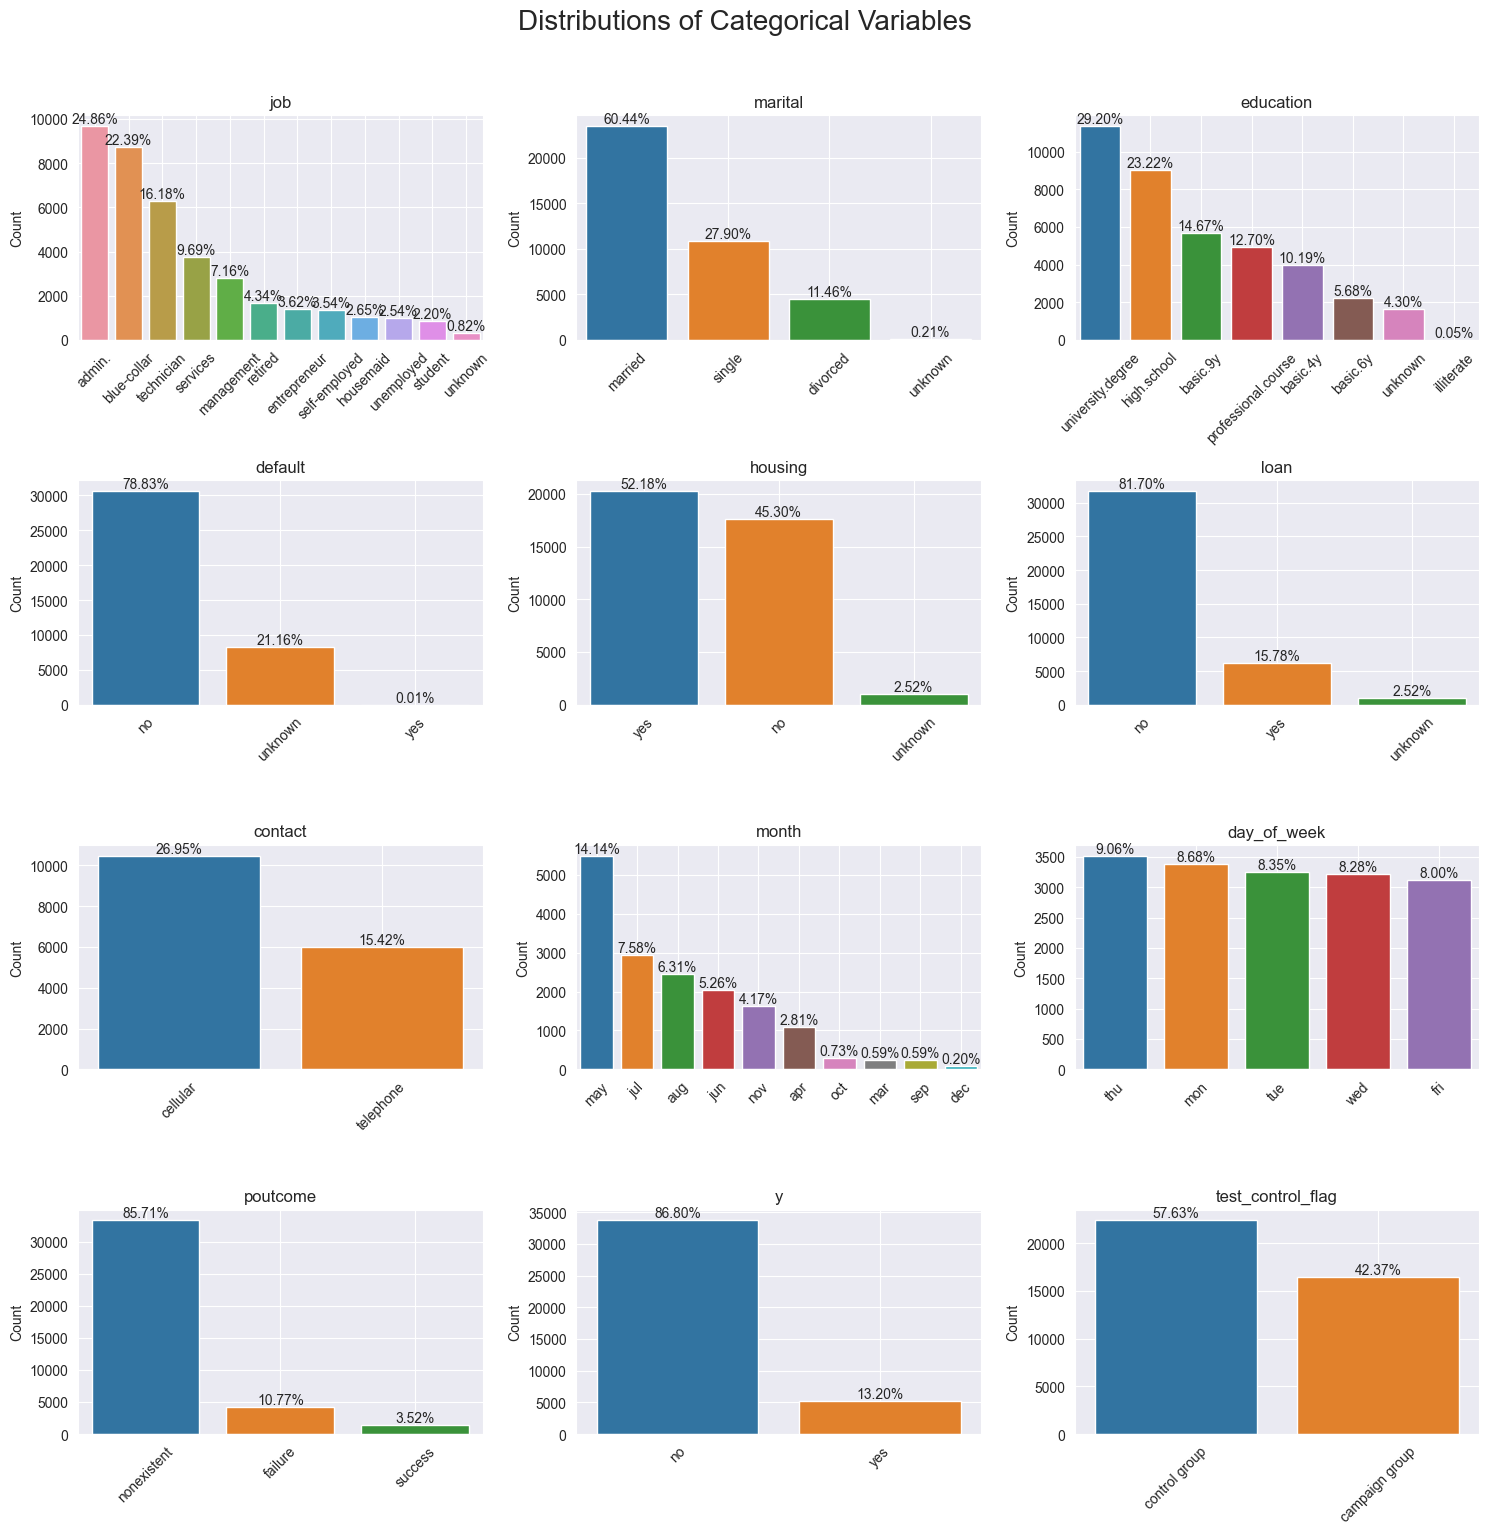

In [186]:
plot_categorical_distributions(df, categorical_cols)

### The distribution of target 'y' across categorical variables with corresponding percentage value

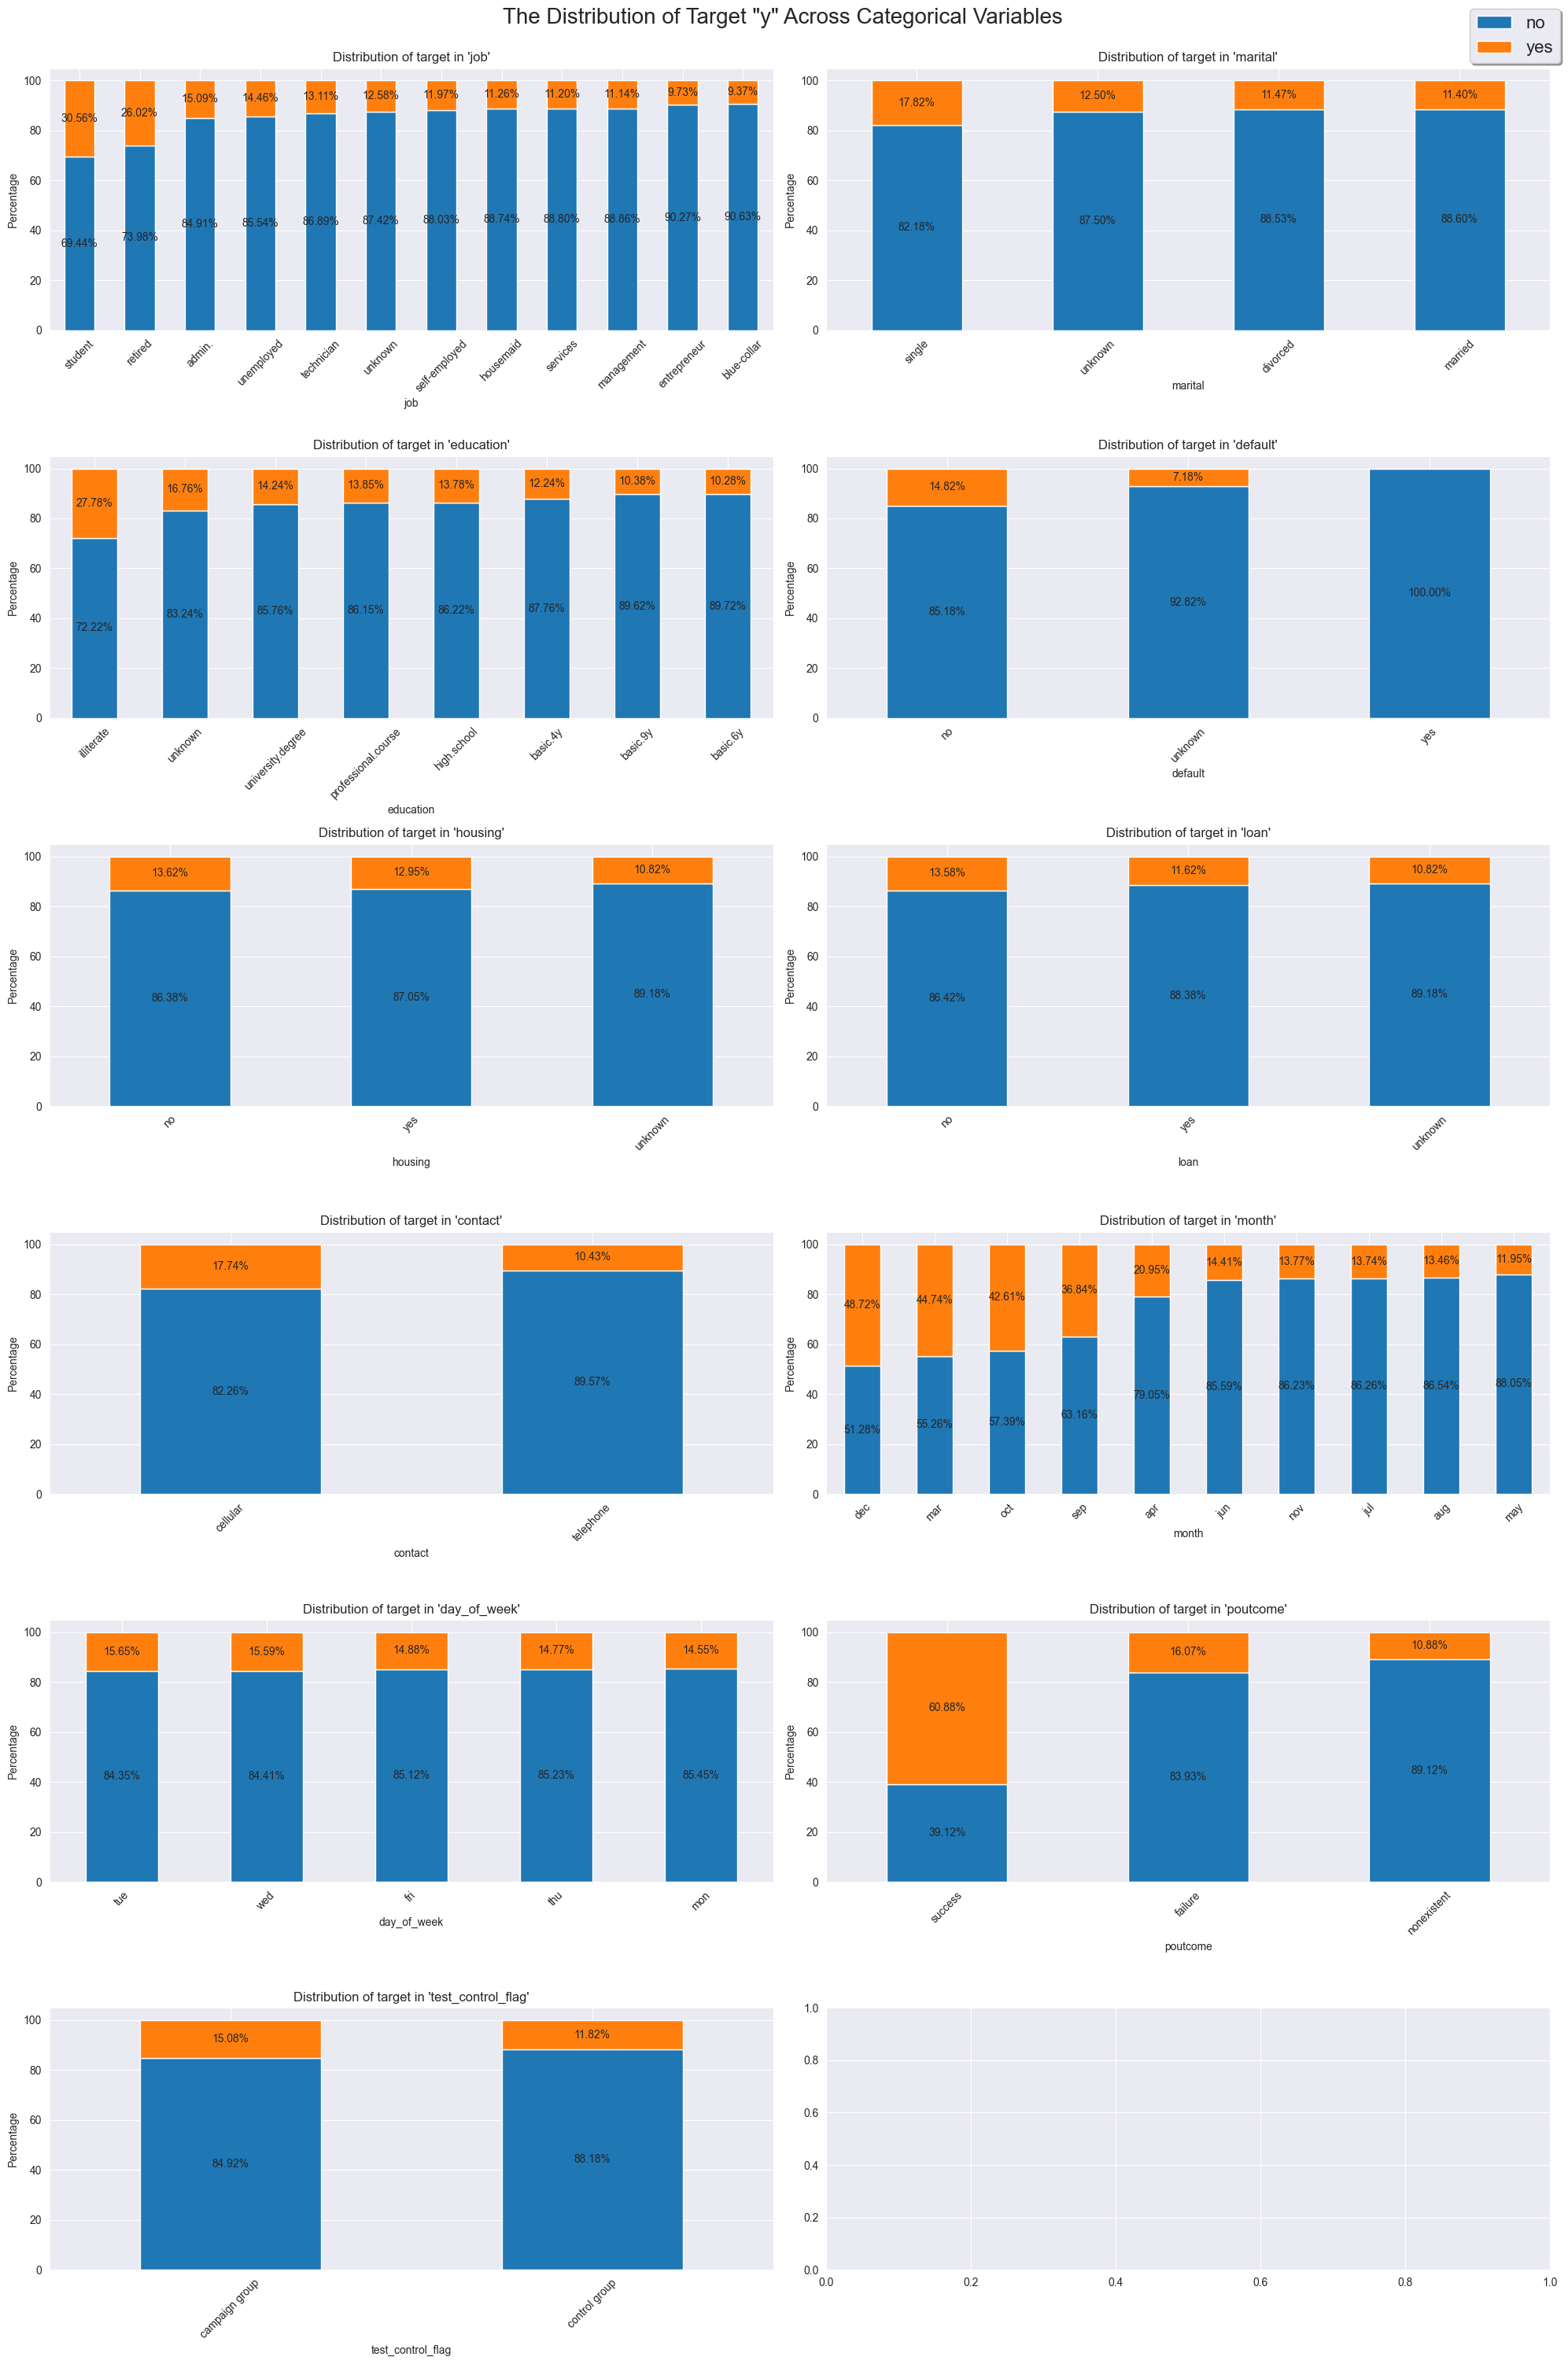

In [187]:
plot_target_distribution(df, categorical_cols)

### Comparative analysis between campaign and control

In [188]:
campaign_group = df_raw[df_raw['test_control_flag'] == 'campaign group']
control_group = df_raw[df_raw['test_control_flag'] == 'control group']

In [189]:
conversion_rate_campaign = campaign_group['y'].value_counts(normalize=True)['yes']
conversion_rate_control = control_group['y'].value_counts(normalize=True)['yes']
lift = (conversion_rate_campaign - conversion_rate_control) / conversion_rate_campaign

print(f"Conversion rate for campaign group: {conversion_rate_campaign:.2%}")
print(f"Conversion rate for control group: {conversion_rate_control:.2%}")
print(f"Lift: {lift:.2%}")

Conversion rate for campaign group: 15.08%
Conversion rate for control group: 10.86%
Lift: 27.96%


The following conversion rates mean that 15.08% of the entire campaign group and only 10.86% of the entire control group responded 'yes'
The lift of the current campaign is 27.96%, indicating that the campaign increased the conversion rate by approximately 28% compared to the control group.

In [190]:
campaign_group = df[df['test_control_flag'] == 'campaign group']
control_group = df[df['test_control_flag'] == 'control group']

In [191]:
campaign_group.drop(['contact', 'month', 'day_of_week', 'duration', 'campaign'], axis=1, inplace=True)
control_group.drop(['contact', 'month', 'day_of_week', 'duration', 'campaign'], axis=1, inplace=True)

### Comparison of categorical variable distributions between campaign and control groups

In [192]:
calegorical_cols_campaign_control = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'y']

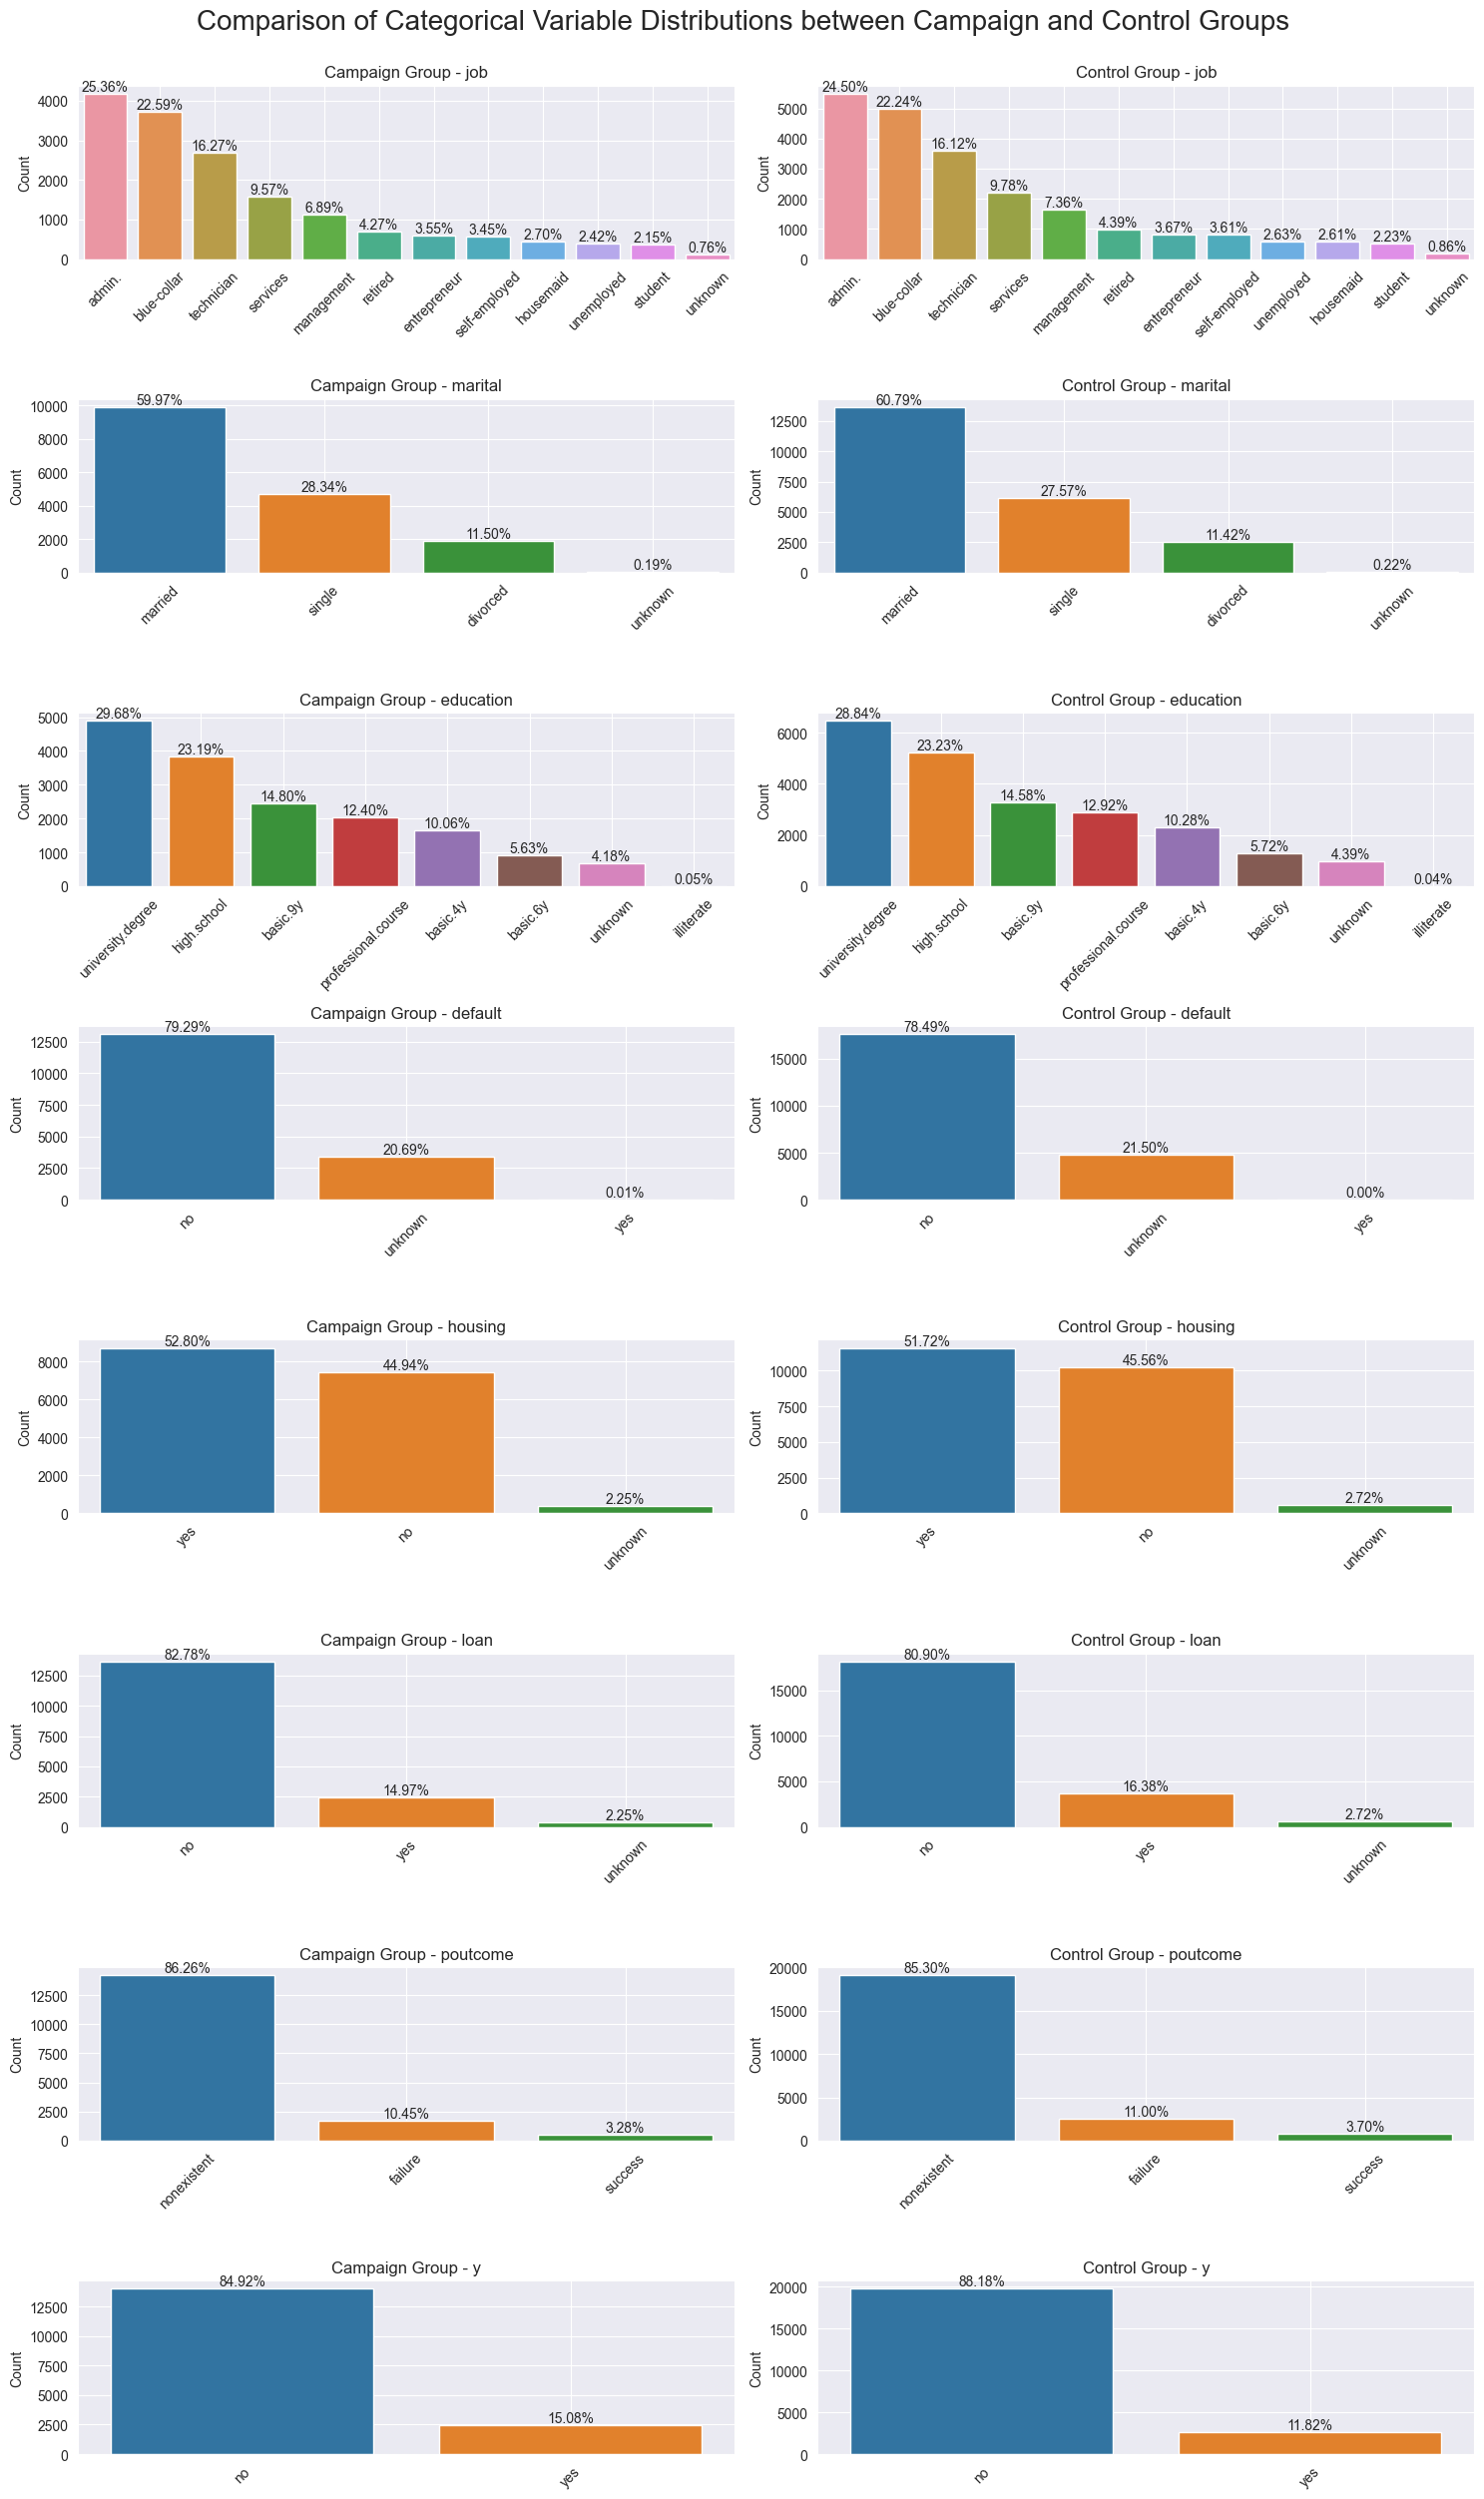

In [193]:
compare_categorical_distributions(campaign_group, control_group, calegorical_cols_campaign_control)

### Comparison of target 'y' distribution across categorical variables between Campaign and Control groups

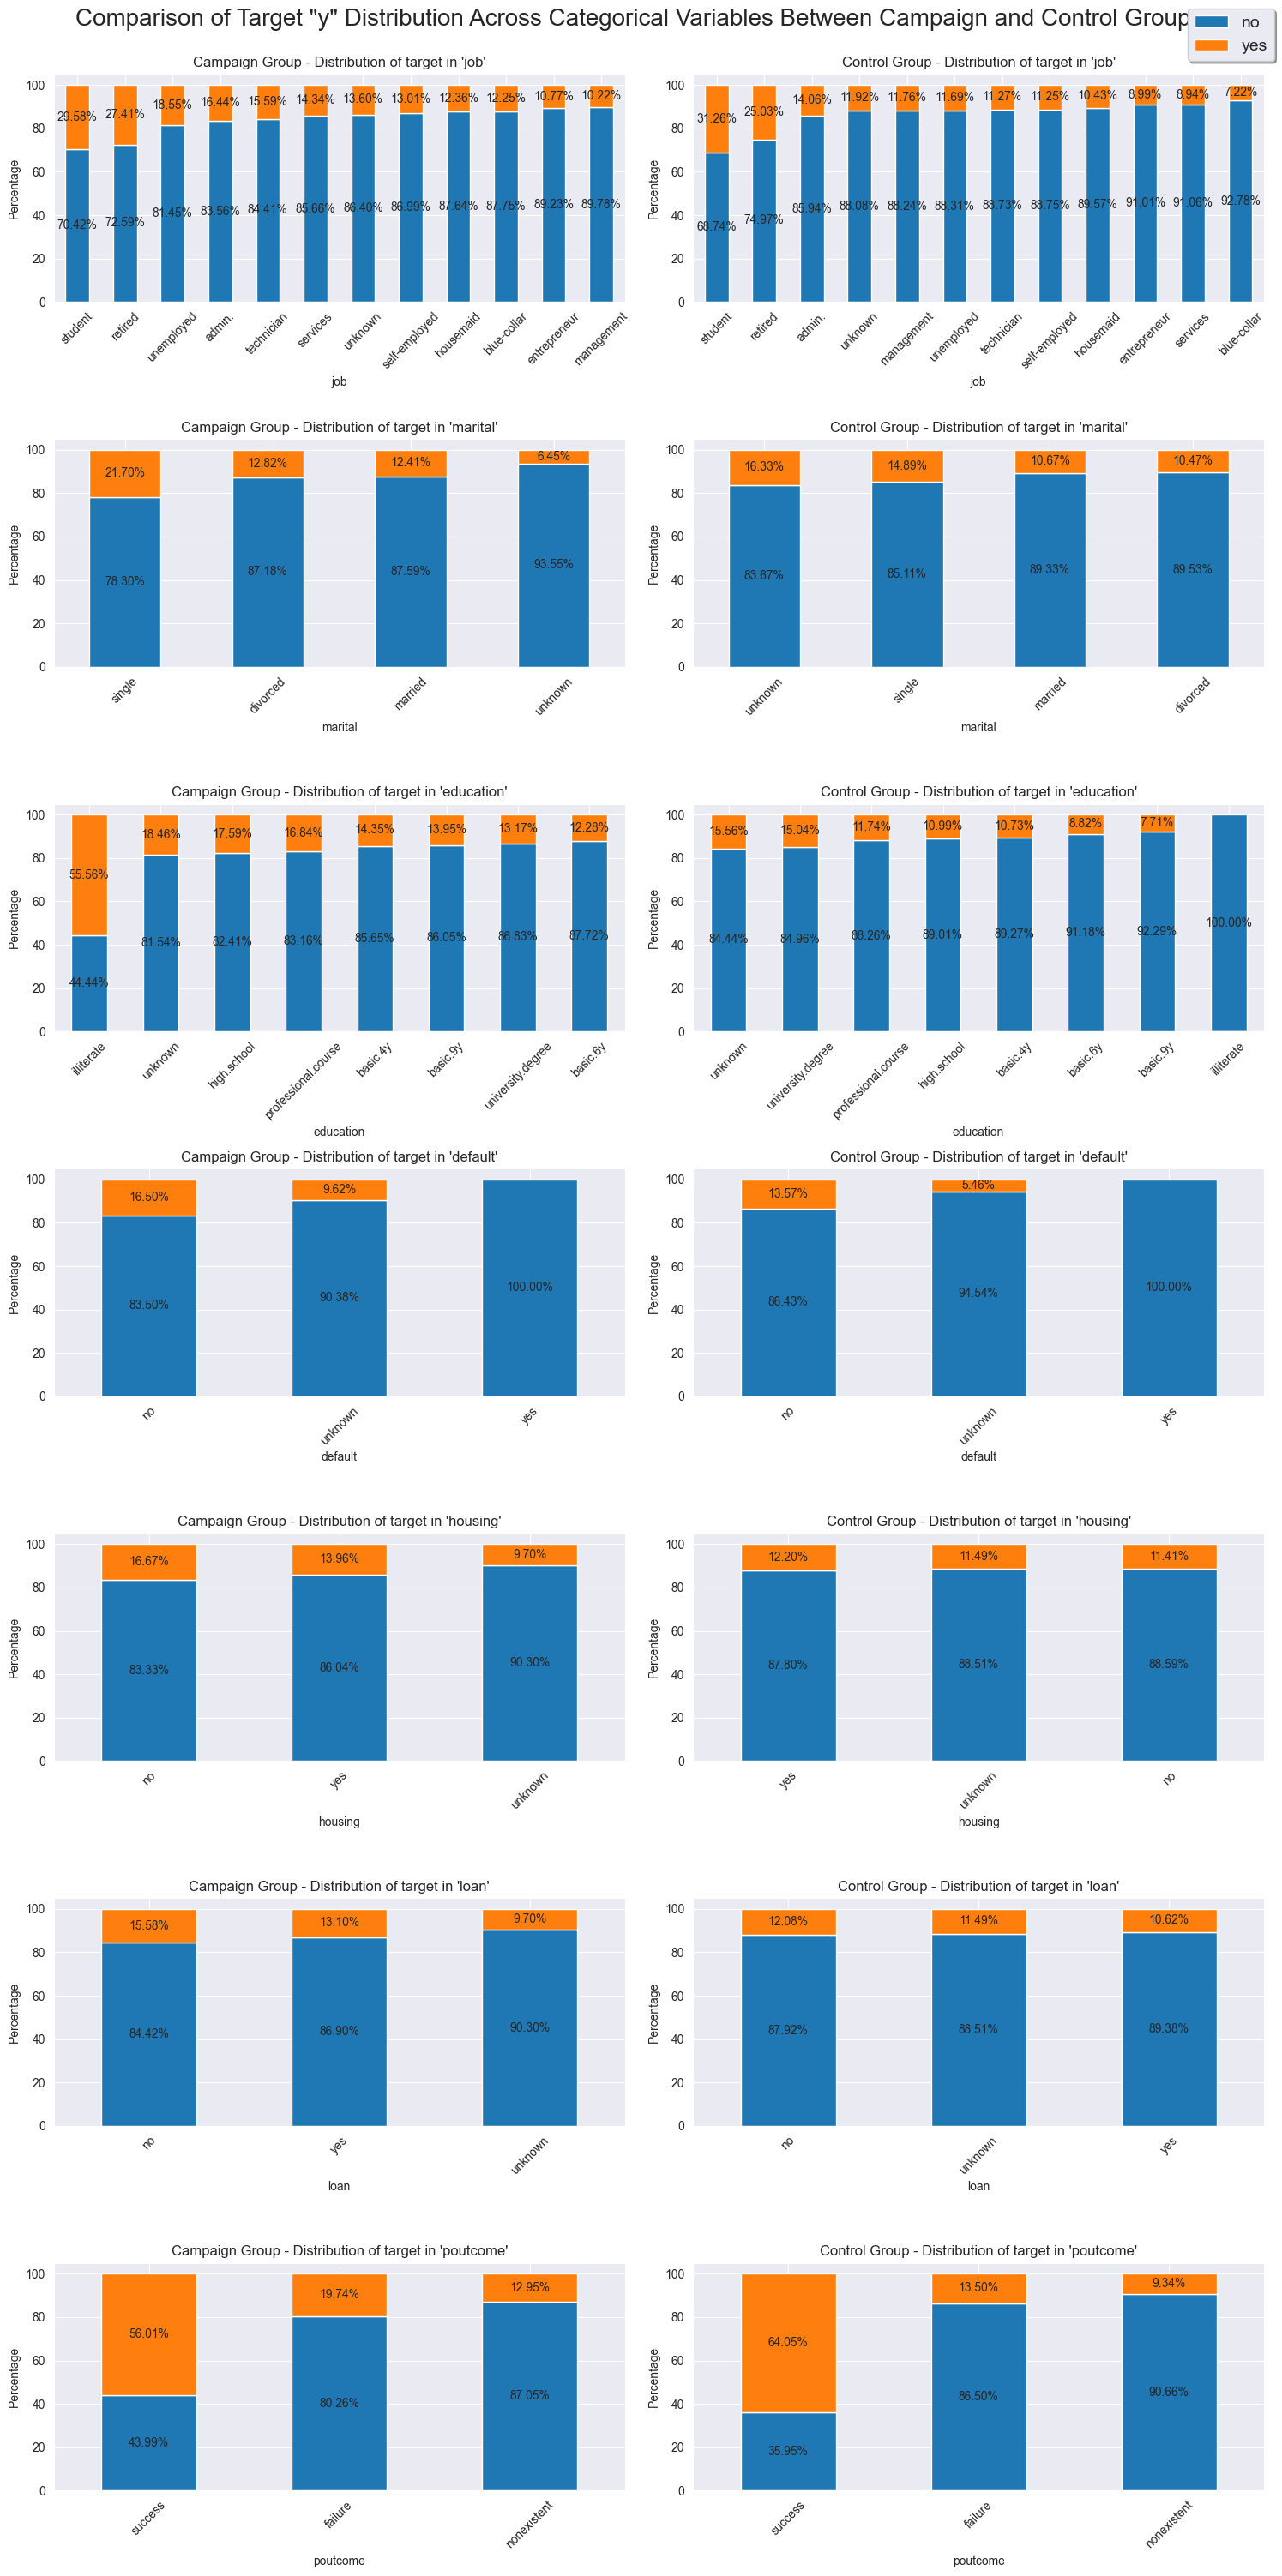

In [194]:
compare_target_distributions(campaign_group, control_group, calegorical_cols_campaign_control)

### Comparison of numerical variable distribution between Campaign and Control groups by target 'y'

In [195]:
numeric_cols_campaign_control =  ['age', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']

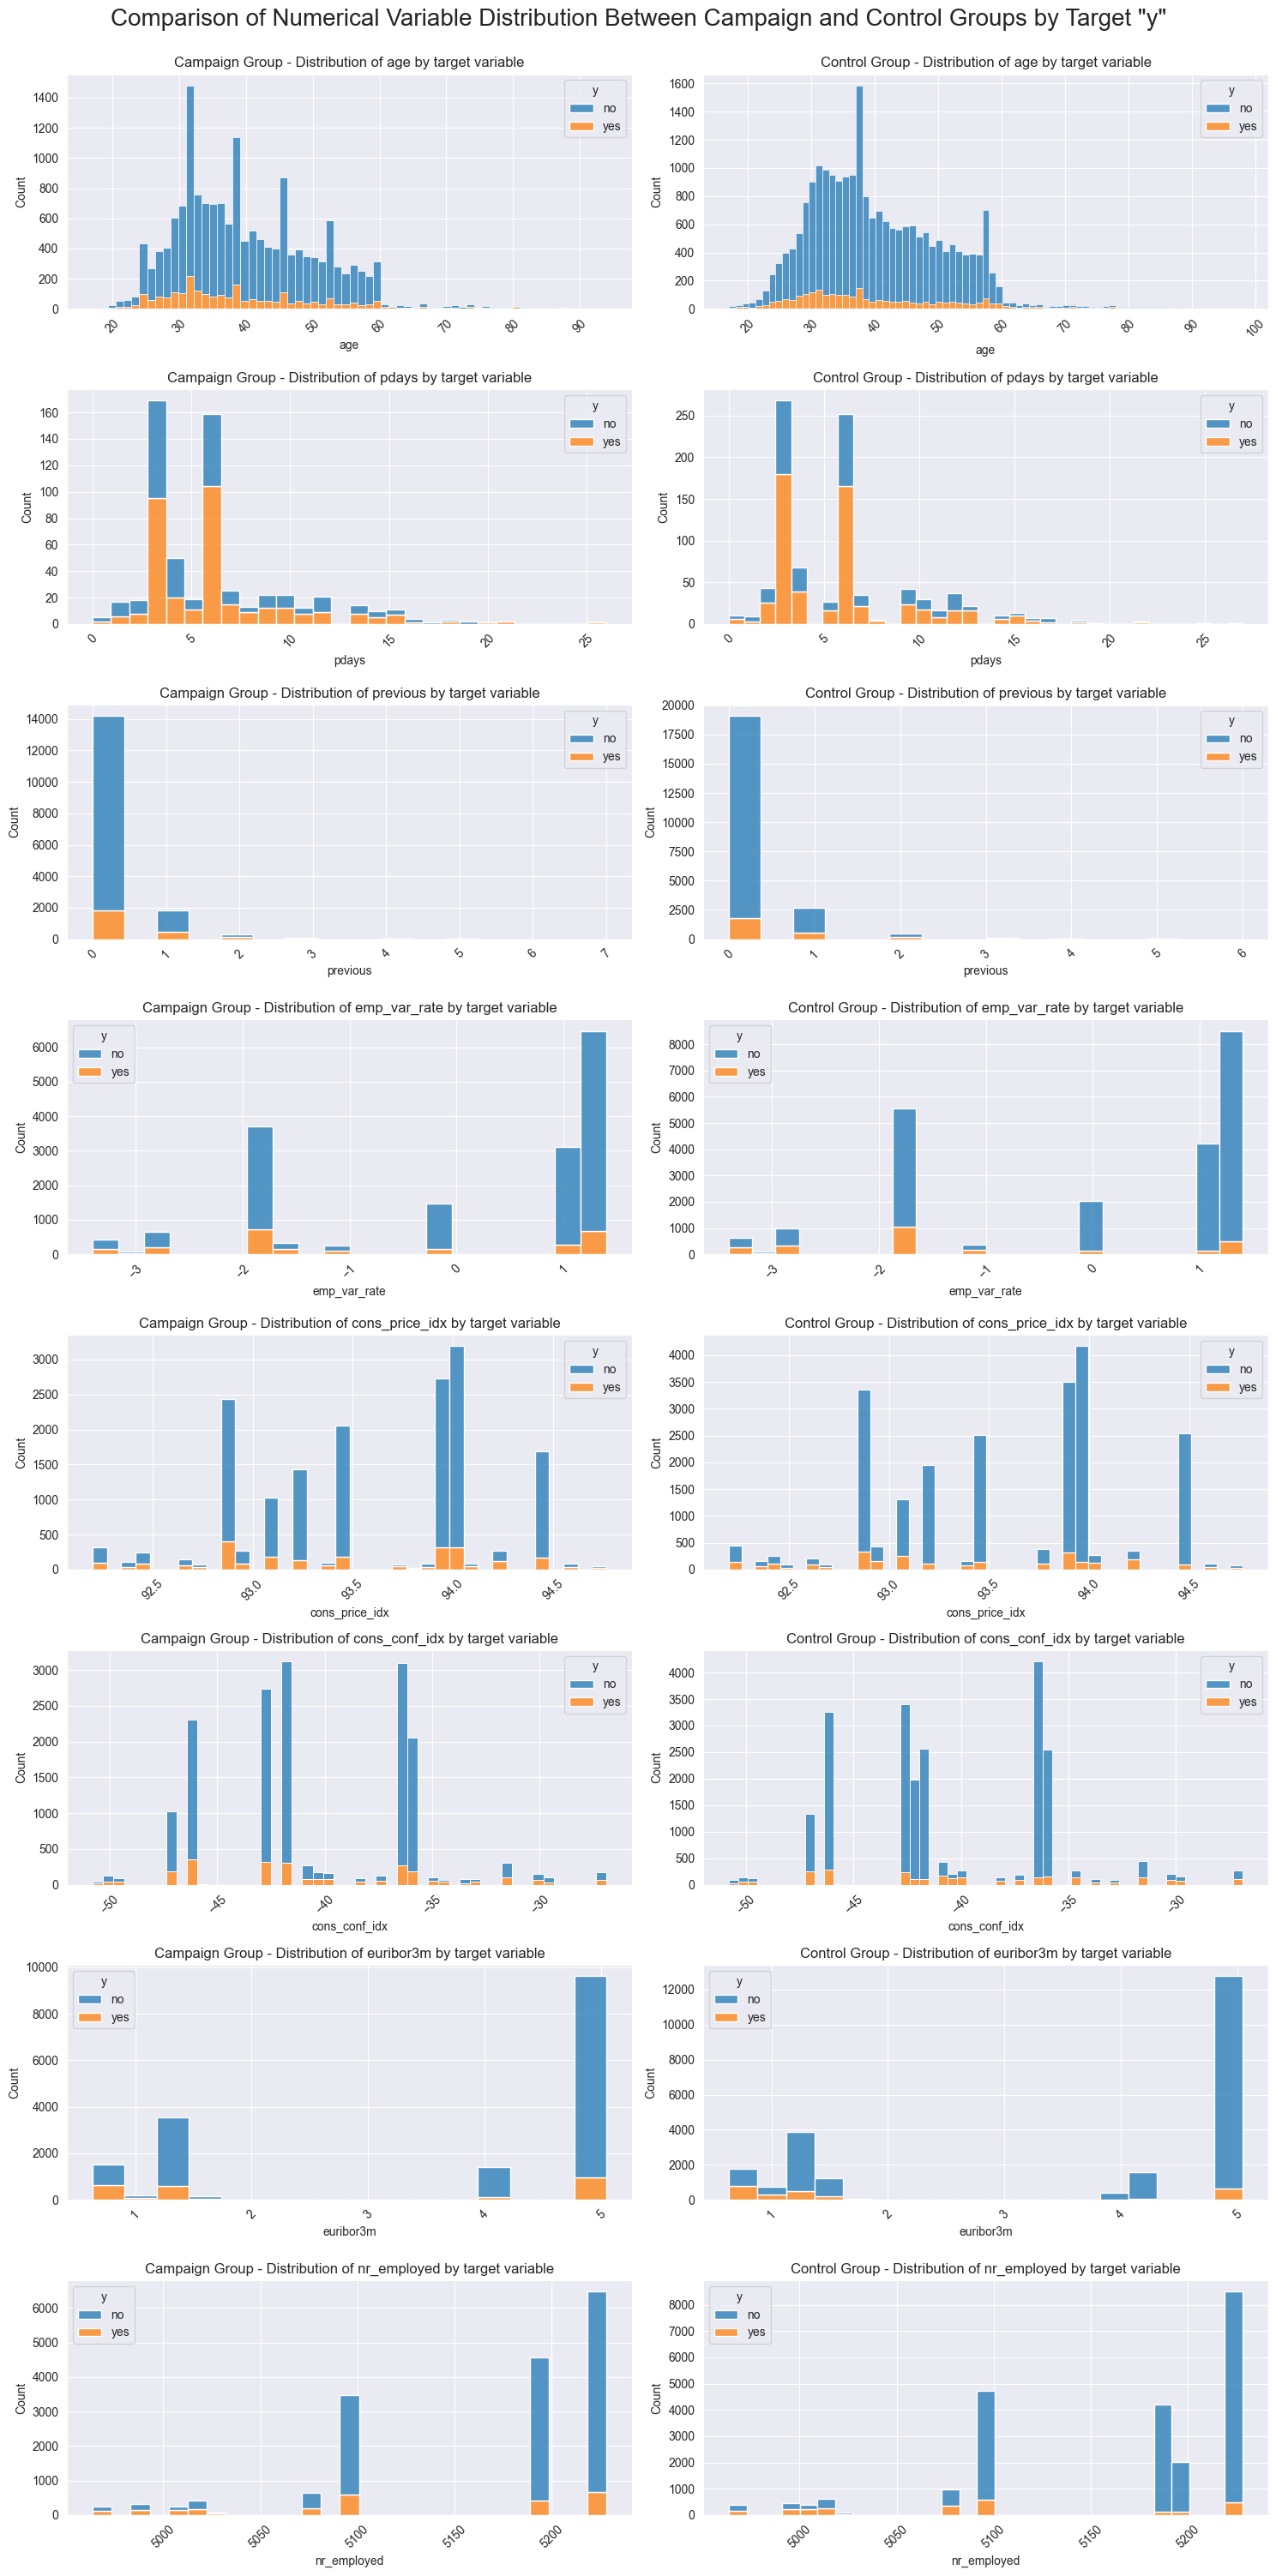

In [196]:
compare_numeric_distributions(campaign_group, control_group, numeric_cols_campaign_control)

### Boxplots of numeric variables by target 'y'

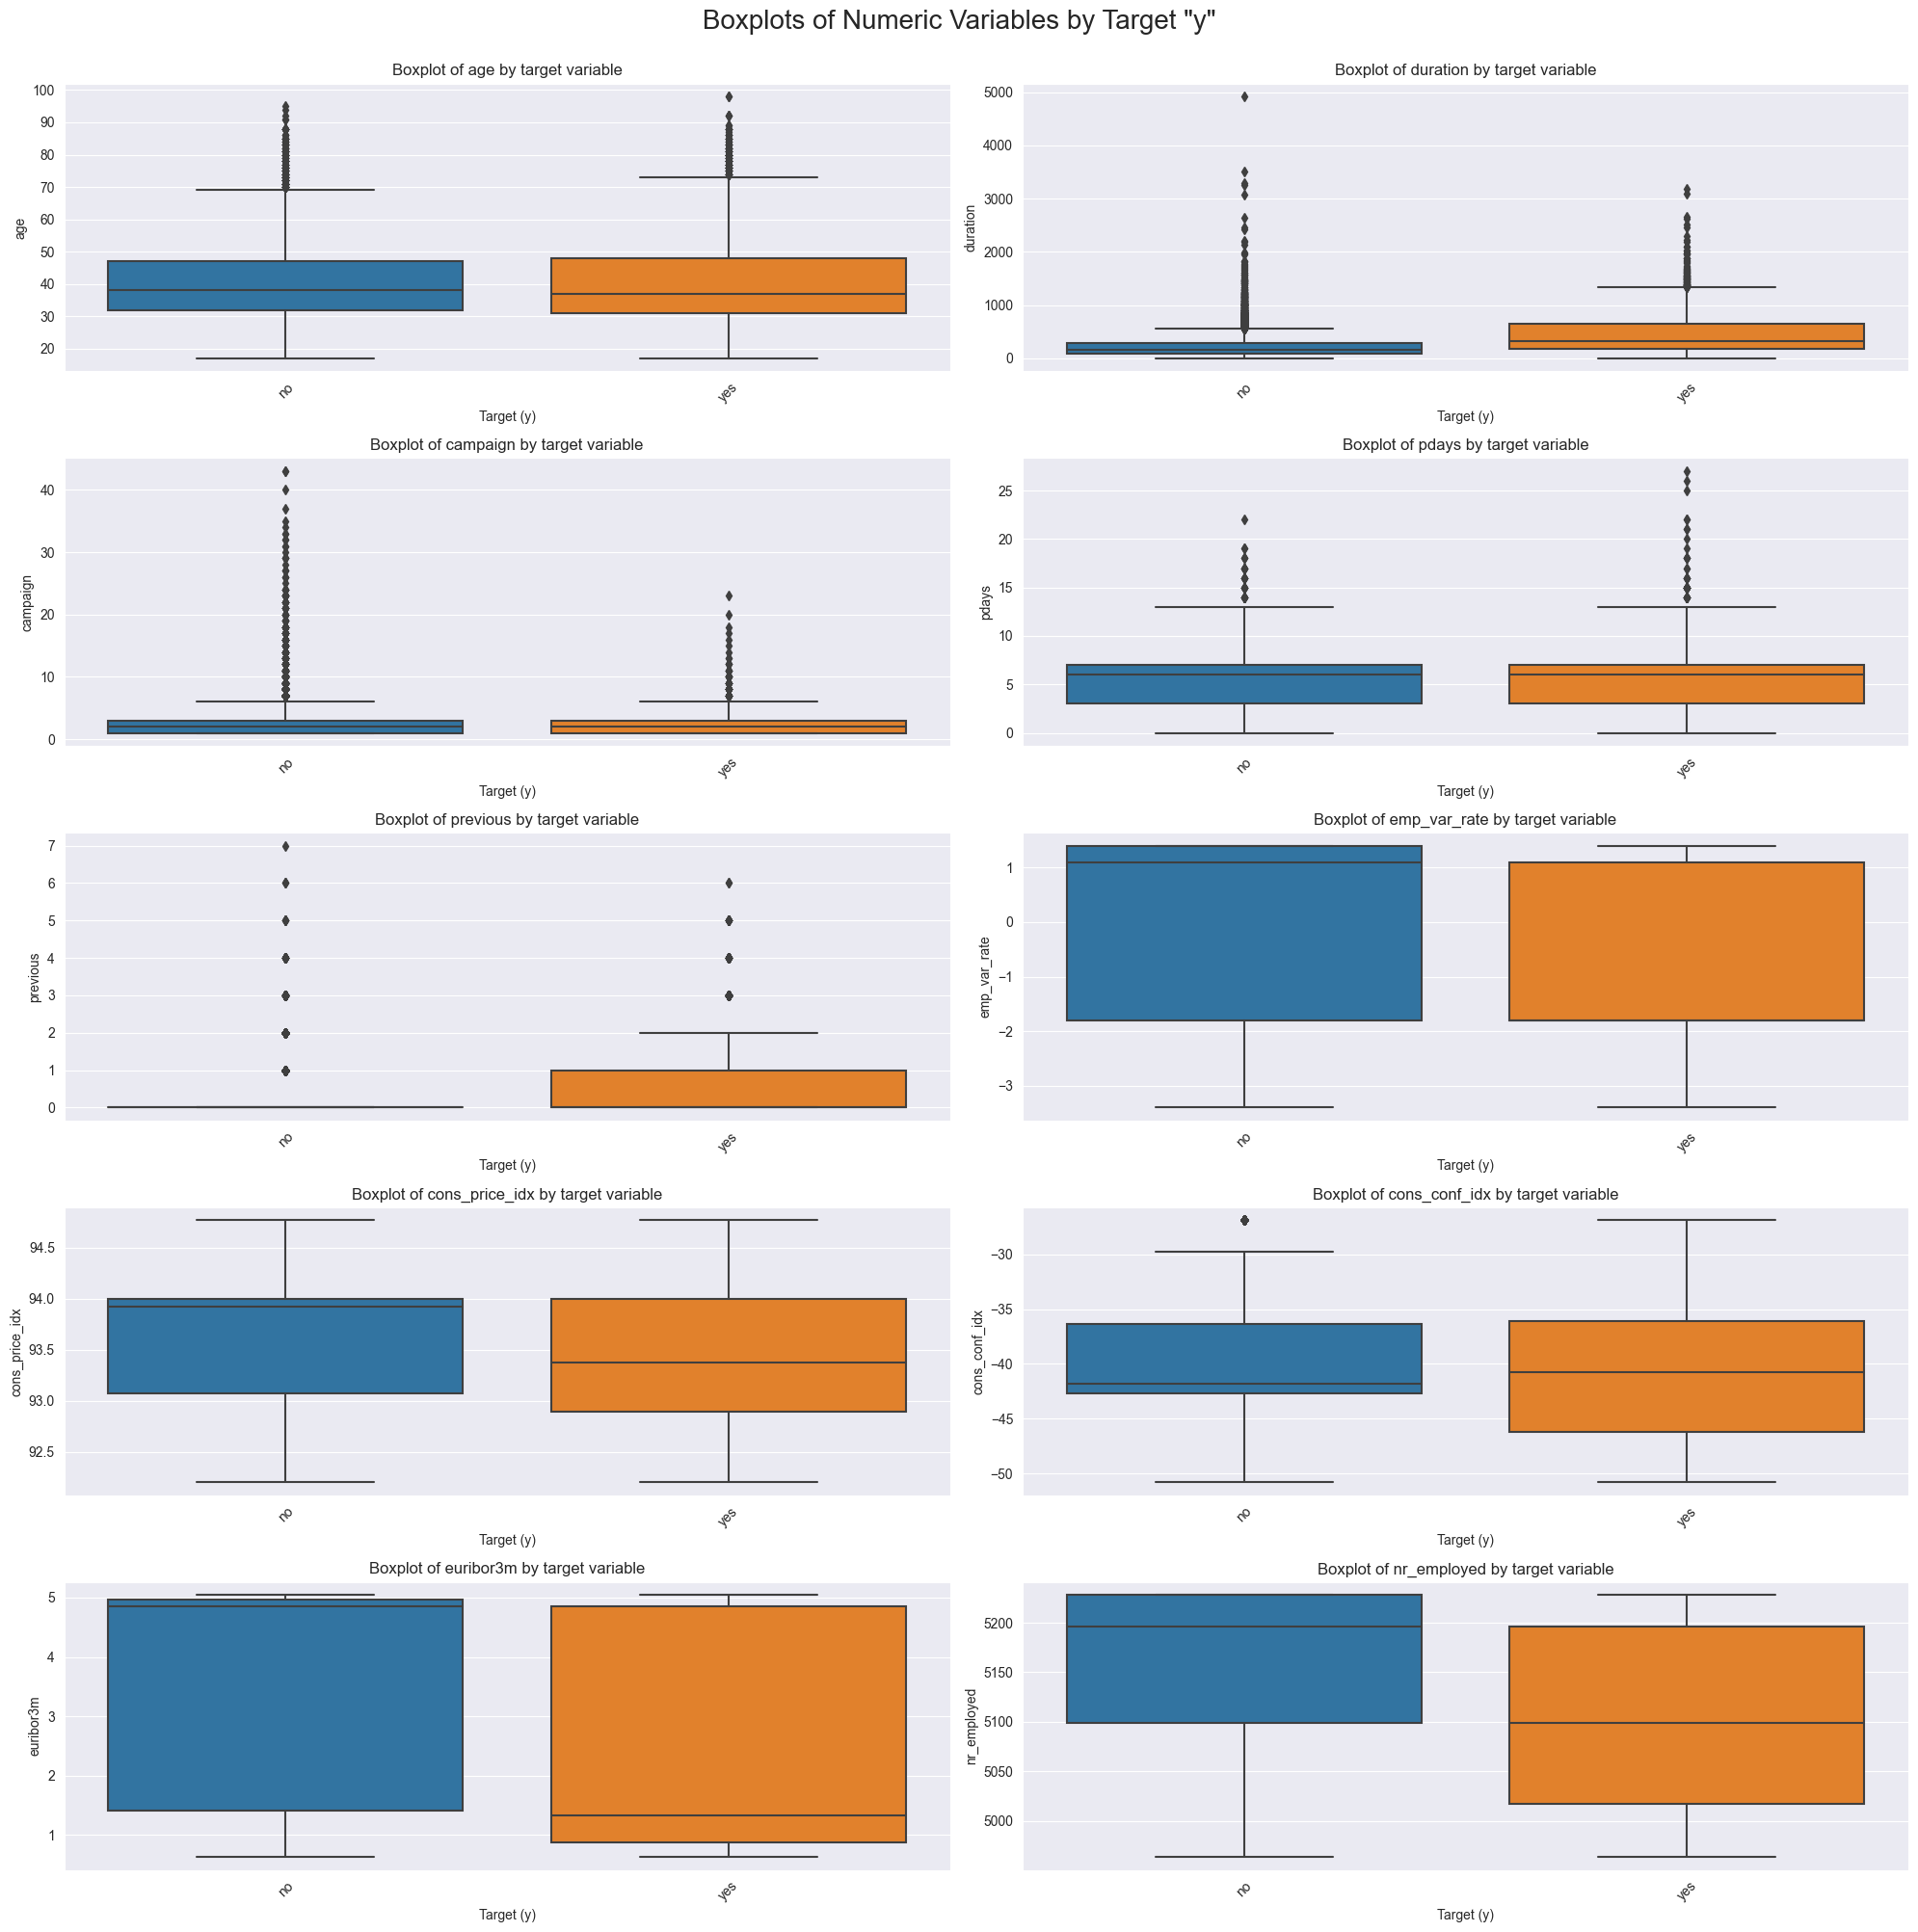

In [197]:
plot_numeric_boxplots(df, numeric_cols)

### Comparison of boxplots between Campaign and Control groups by target 'y'

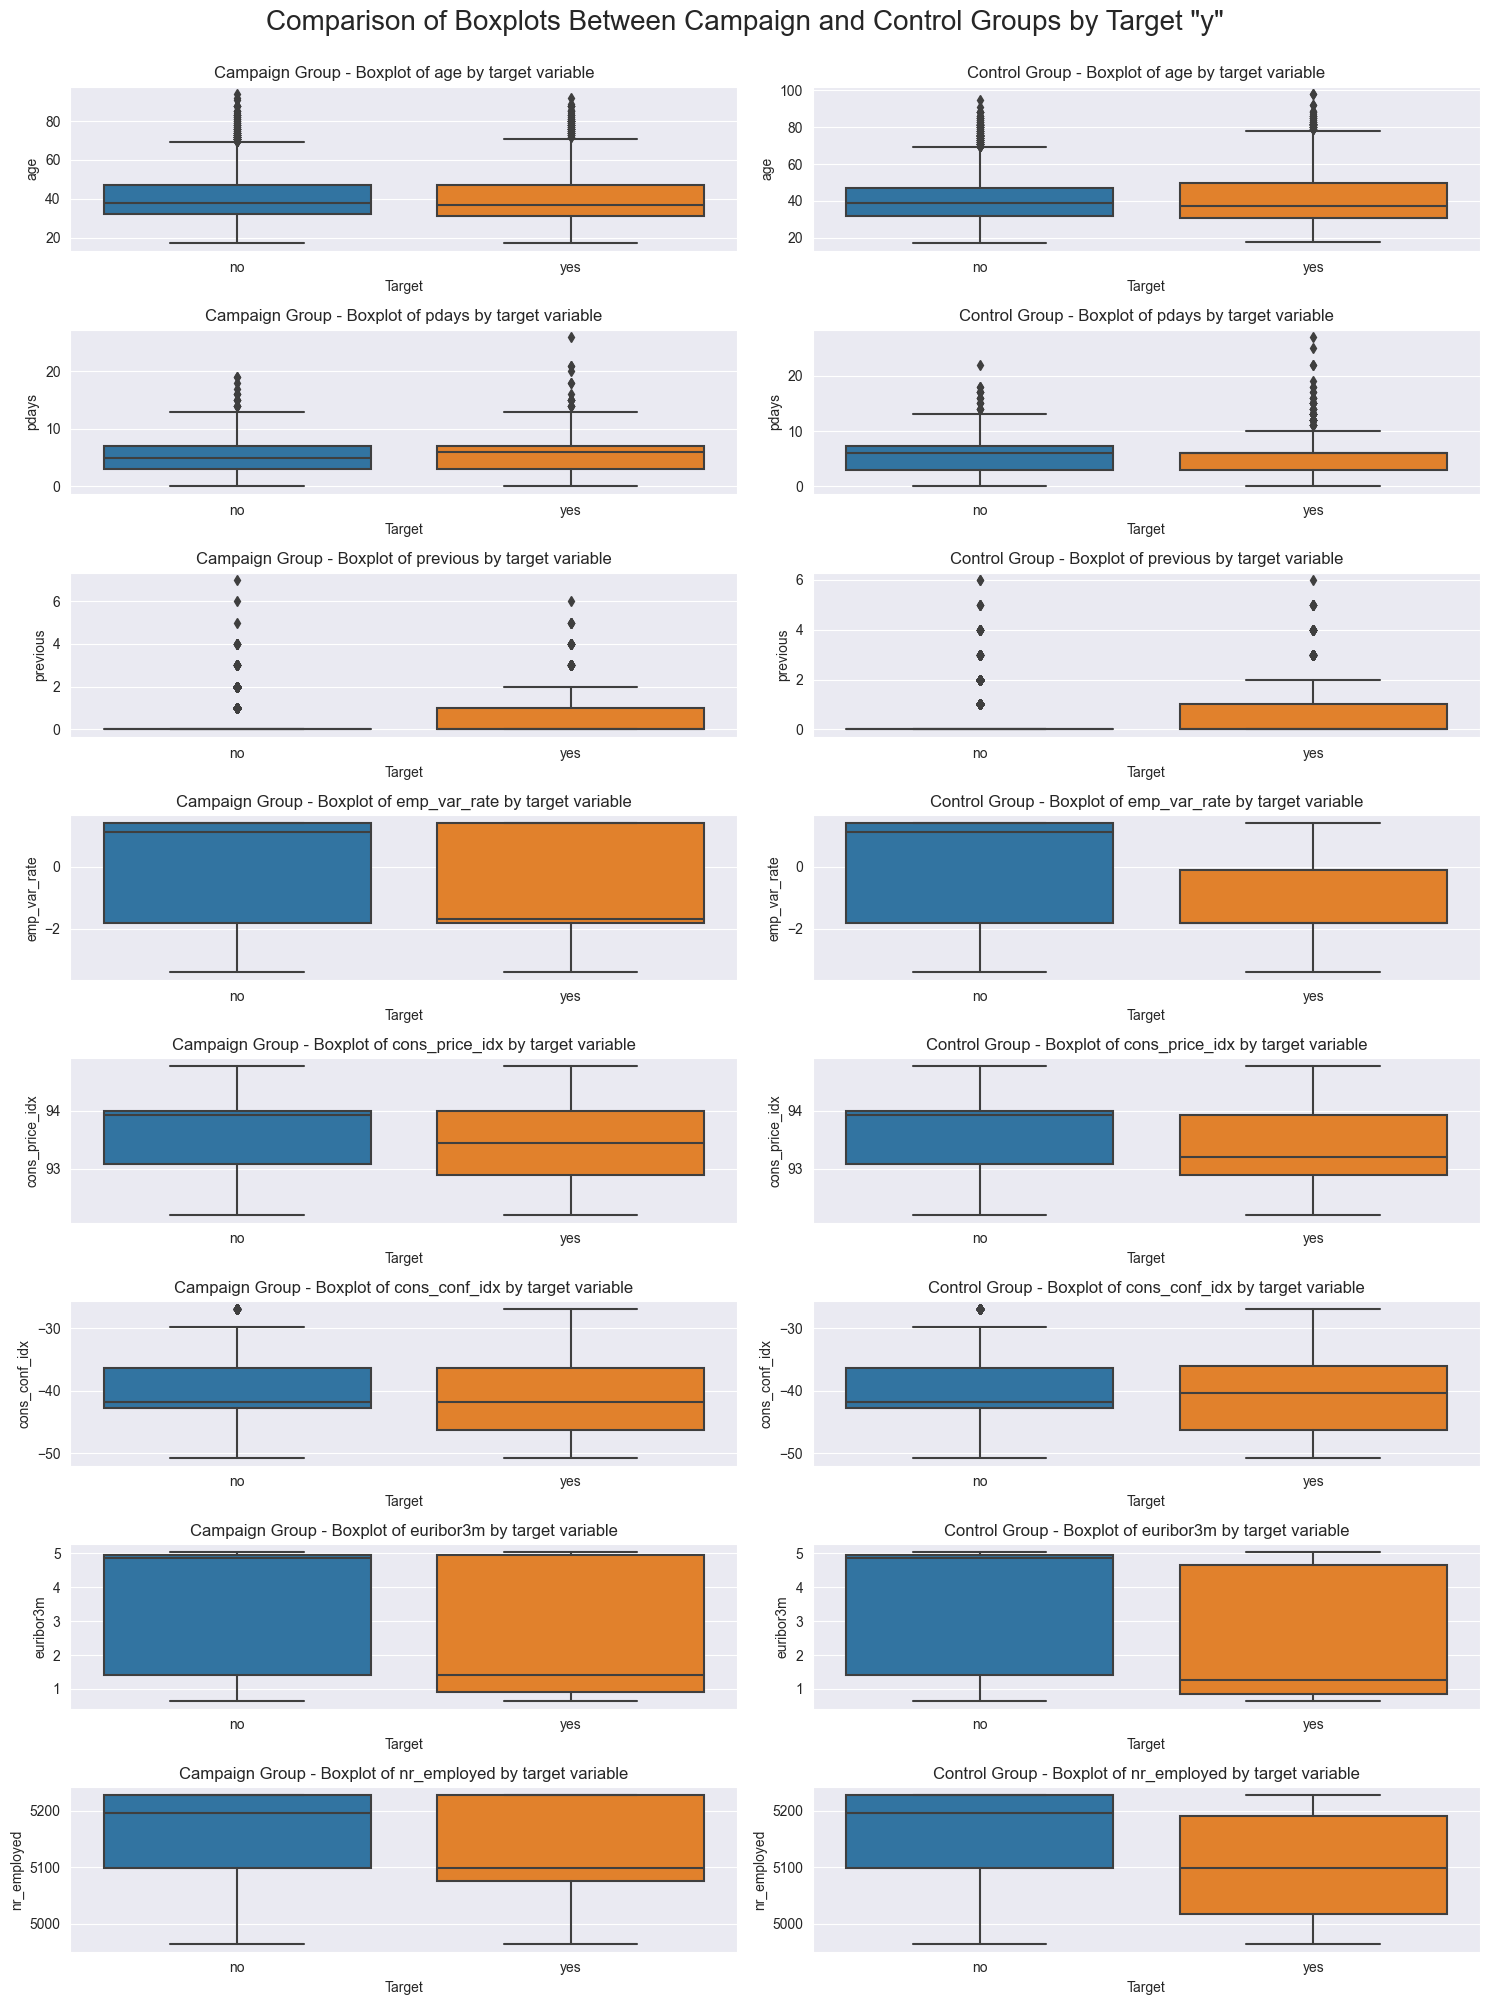

In [198]:
compare_boxplots(campaign_group, control_group, numeric_cols_campaign_control)

### Age

It is hard to retrieve information about the disribution of age by target variable from the histogram. Let's bucketize it based on quartiles.

In [199]:
age_quantiles = np.quantile(df['age'], [0, 0.25, 0.5, 0.75, 1.0])
print(age_quantiles)

[17. 32. 38. 47. 98.]


In [200]:
bins = [17, 32, 47, 70, 98]
labels = ['[17, 32]', '(32, 47]', '(47, 70]', '(70, 98]']

df['age'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


In [201]:
campaign_group['age'].describe()

count   16474.00
mean       39.99
std        10.49
min        17.00
25%        32.00
50%        38.00
75%        47.00
max        94.00
Name: age, dtype: float64

In [202]:
bins = [0, 32, 47, 70, 94]
labels = ['[0, 32]', '(32, 47]', '(47, 70]', '(70, 94]']

campaign_group['age'] = pd.cut(campaign_group['age'], bins=bins, labels=labels, right=False)

In [203]:
control_group['age'].describe()

count   22408.00
mean       40.28
std        10.49
min        17.00
25%        32.00
50%        38.00
75%        47.00
max        98.00
Name: age, dtype: float64

In [204]:
bins = [0, 32, 47, 70, 98]
labels = ['[0, 32]', '(32, 47]', '(47, 70]', '(70, 98]']
control_group['age'] = pd.cut(control_group['age'], bins=bins, labels=labels, right=False)

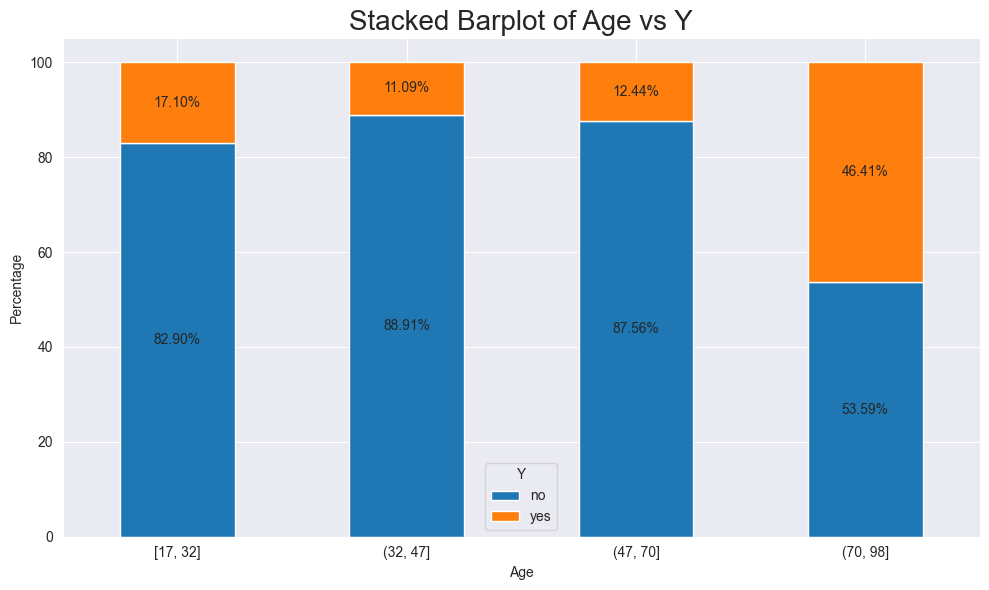

In [205]:
plot_stacked_bar(df, 'age')

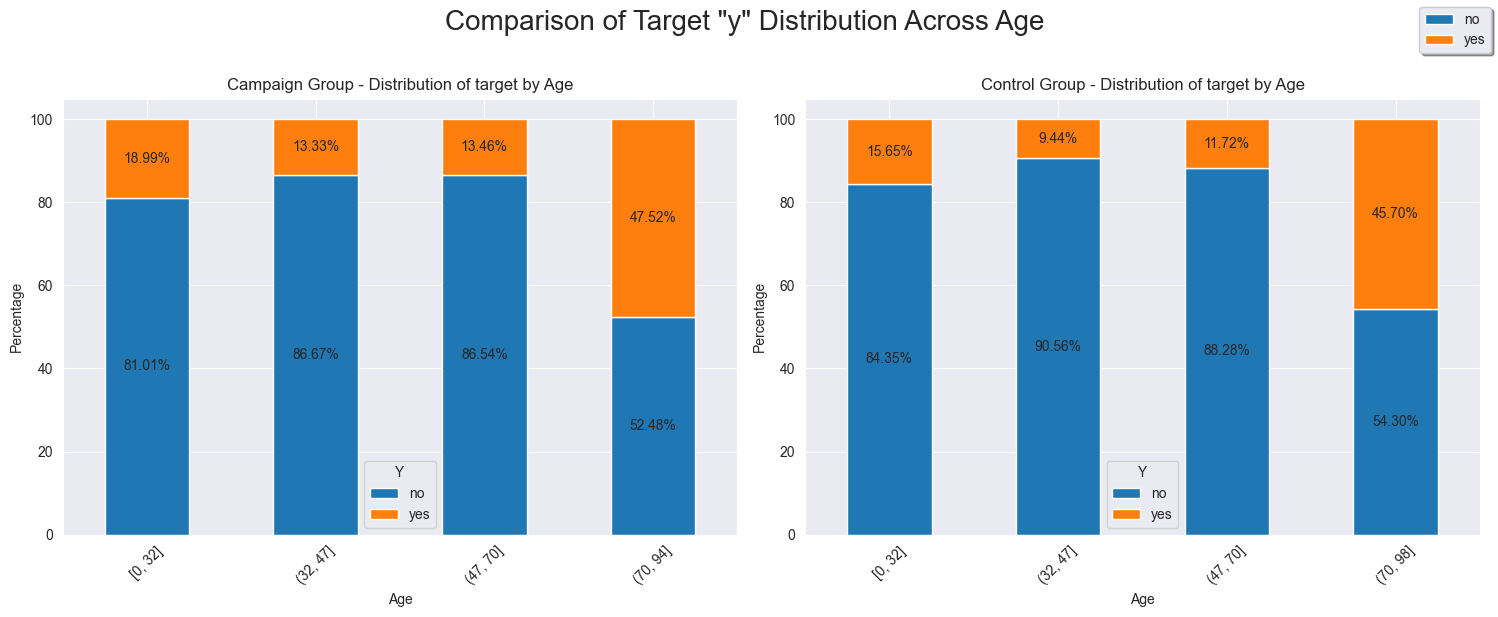

In [206]:
compare_stacked_bar(campaign_group, control_group, 'age')

## Feature Engineering 

In [207]:
df_raw = df_raw.rename(columns={df_raw.columns[0]: 'client_id'})

In [208]:
colnames_to_change = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "nr.employed"]
dict = {}

for col in colnames_to_change:
    new = col.replace(".", "_")
    dict[col] = new
    
df_raw = df_raw.rename(columns = dict)

In [209]:
df_raw['pdays'].replace(999, np.nan, inplace = True)

In [210]:
quantiles = df_raw['pdays'].quantile([0, 0.25, 0.5, 0.75, 1.0])
quantiles

0.00    0.00
0.25    3.00
0.50    6.00
0.75    7.00
1.00   27.00
Name: pdays, dtype: float64

In [211]:
bins = [0, 3, 6, 12, 27]
labels = ['Q1', 'Q2', 'Q3', 'Q4']

df_raw['pdays'] = pd.cut(df_raw['pdays'], bins=bins, labels=labels, right=False)

In [212]:
df_raw['pdays'] = df_raw['pdays'].cat.add_categories('missing').fillna('missing')

In [213]:
age_quantiles = np.quantile(df_raw['age'], [0, 0.25, 0.5, 0.75, 1.0])
print(age_quantiles)

[17. 32. 38. 47. 98.]


In [214]:
bins = [17, 32, 38, 47, 99]
labels = ['Q1', 'Q2', 'Q3', 'Q4']

df_raw['age'] = pd.cut(df_raw['age'], bins=bins, labels=labels, right=False)

In [215]:
df_raw['age'].value_counts()

Q4    10801
Q3    10619
Q2    10438
Q1     9330
Name: age, dtype: int64

In [216]:
df_clean = df_raw.copy()

In [217]:
df_clean.pdays.value_counts()

missing    39674
Q3           634
Q2           603
Q4           175
Q1           102
Name: pdays, dtype: int64

## Modelling


So my idea to approach this problem is to build 2 separate models:
- first, using all the observations and disregarding variables related with the last contact of the current campaign, keeping only varible 'test_control_flag', aiming to improve the performance of future campaigns
- second, using only observations from campaign subset to check which features related with the last contact of the current campaign are impacting the client's decision

In [218]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, classification_report, roc_auc_score, average_precision_score, precision_score, average_precision_score, precision_recall_curve, roc_curve, auc, confusion_matrix, recall_score

import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import scikitplot as skplt

from mlxtend.feature_selection import SequentialFeatureSelector

import dalex as dx


#### Data preprocessing

In [219]:
predictors_full = df_raw.columns.drop(['y', 'client_id', 'contact', 'month', 'day_of_week', 'duration', 'campaign'])

X_full = df_raw[predictors_full]
y_full = df_raw['y']

y_full.replace({'yes': 1, 'no': 0}, inplace=True)

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, stratify=y_full, test_size=0.2, random_state=123)


numeric_features = X_train_full.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train_full.select_dtypes(include=['object', 'category']).columns
missing_features = ['cons_price_idx']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


X_train_full = preprocessor.fit_transform(X_train_full)
columns = numeric_features.tolist() + preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()
X_train_full = pd.DataFrame(X_train_full, columns=columns)

X_test_full = preprocessor.transform(X_test_full)
X_test_full = pd.DataFrame(X_test_full, columns=columns)

In [220]:
classifiers = {
    "LogisticRegression": LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=False),
    'AdaBoost': AdaBoostClassifier(),
    'LightGBM': lgb.LGBMClassifier()
}

metrics_dict = {
    'Accuracy': {},
    'Balanced Accuracy': {},
    'ROC AUC': {},
    'Precision': {},
    'Recall': {},
    'F1 Score': {},
}

for name, model in classifiers.items():

    model.fit(X_train_full, y_train_full)

    y_pred = model.predict(X_test_full)
    y_prob = model.predict_proba(X_test_full)[:, 1]

    # Store evaluation metrics in dictionaries
    metrics_dict['Accuracy'][name] = accuracy_score(y_test_full, y_pred)
    metrics_dict['Balanced Accuracy'][name] = balanced_accuracy_score(y_test_full, y_pred)
    metrics_dict['ROC AUC'][name] = roc_auc_score(y_test_full, y_pred)
    metrics_dict['Precision'][name] = precision_score(y_test_full, y_pred)
    metrics_dict['Recall'][name] = recall_score(y_test_full, y_pred)
    metrics_dict['F1 Score'][name] = f1_score(y_test_full, y_pred)

# Create a combined DataFrame
combined_df = pd.DataFrame(metrics_dict)
combined_df.index.name = 'Model'

# Display the combined DataFrame
display(combined_df)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4134, number of negative: 28816
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 308
[LightGBM] [Info] Number of data points in the train set: 32950, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.125463 -> initscore=-1.941685
[LightGBM] [Info] Start training from score -1.941685


,Accuracy,Balanced Accuracy,ROC AUC,Precision,Recall,F1 Score
Model,,,,,,
LogisticRegression,0.88,0.57,0.57,0.63,0.15,0.24
Random Forest,0.86,0.59,0.59,0.40,0.22,0.28
XGBoost,0.88,0.59,0.59,0.52,0.20,0.29
CatBoost,0.88,0.58,0.58,0.57,0.18,0.28
AdaBoost,0.88,0.57,0.57,0.59,0.16,0.26
LightGBM,0.88,0.57,0.57,0.61,0.16,0.26


In [221]:
scale_pos_weight = (y_train_full.shape[0] - y_train_full.sum()) / y_train_full.sum()

FFS_LGB_prec_full = SequentialFeatureSelector(
    lgb.LGBMClassifier(objective='binary', scale_pos_weight=scale_pos_weight, n_jobs=-1, random_state=123),
    k_features=(1,12),
    forward=True,
    verbose=2,
    cv=3,
    scoring = 'average_precision',
    n_jobs=-1).fit(X_train_full, y_train_full)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:   24.2s finished

[2024-06-06 11:09:48] Features: 1/12 -- score: 0.3471673556053094[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
list(FFS_LGB_prec_full.k_feature_names_)

['cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'age_Q3',
 'marital_single',
 'education_university.degree',
 'pdays_missing',
 'poutcome_failure',
 'poutcome_success',
 'test_control_flag_campaign group']

In [ ]:
selected_features_full_lgb = ['cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'age_Q3',
 'marital_single',
 'education_university.degree',
 'pdays_missing',
 'poutcome_failure',
 'poutcome_success',
 'test_control_flag_campaign group']

In [ ]:
X_train_full_final = X_train_full[selected_features_full_lgb]
X_test_full_final= X_test_full[selected_features_full_lgb]

In [ ]:
def random_search(X, y, params, model, n_iter=10, n_splits=5, scoring='precision_score', seed=123):
    """
    Perform random search with cross-validation.

    Returns:
    results (dict): A dictionary of the results
    """

    # Perform random search with cross-validation
    random_search = RandomizedSearchCV(
        model,
        param_distributions=params,
        n_iter=n_iter,
        scoring=scoring,
        n_jobs=-1,
        cv=StratifiedKFold(n_splits=n_splits),
        random_state=seed,
        verbose=4
    )
    random_search.fit(X, y)

    # Extract and return the results
    results = {
        'best_params': random_search.best_params_,
        'best_score': random_search.best_score_,
        'cv_results': random_search.cv_results_
    }
    return results

In [ ]:
scale_pos_weight = (y_train_full.shape[0] - y_train_full.sum()) / y_train_full.sum()

lgb_model = lgb.LGBMClassifier(objective='binary', scale_pos_weight=scale_pos_weight, n_jobs=-1, random_state=123)

params = {
    'learning_rate': [0.02, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_child_weight': [1, 2, 3, 4, 5],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1, 10],
    'reg_lambda': [0, 0.1, 0.5, 1, 10],
    'n_estimators': [100, 250, 500, 750, 1000],
    'num_leaves': [20, 30, 40, 50, 60, 70, 80, 90, 100]
}

results = random_search(X_train_full_final, y_train_full, params, lgb_model, n_iter=30, n_splits=3, scoring='average_precision', seed=123)

best_params_full_lgb = results['best_params']
best_score_full = results['best_score']
cv_results = results['cv_results']

print(f"Best hyperparameters: {best_params_full_lgb}")
print(f"Best score: {best_score_full}")

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best hyperparameters: {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 10, 'num_leaves': 90, 'n_estimators': 250, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best score: 0.42428067936183594


In [ ]:
best_params_full_lgb = {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 10, 'num_leaves': 90, 'n_estimators': 250, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.05, 'colsample_bytree': 0.8}

In [ ]:
model = lgb.LGBMClassifier(**best_params_full_lgb, objective='binary', scale_pos_weight=scale_pos_weight, random_state=123)
model.fit(X_train_full_final, y_train_full)

# predictions on train set
y_pred_train = model.predict(X_train_full_final)
y_prob_train = model.predict_proba(X_train_full_final)

acc_train = accuracy_score(y_train_full,y_pred_train)
balanced_acc_train = balanced_accuracy_score(y_train_full,y_pred_train)
f1_train = f1_score(y_train_full,y_pred_train, average='weighted')
class_report_train = classification_report(y_train_full,y_pred_train)
recall_train = recall_score(y_train_full,y_pred_train)
precision_train = precision_score(y_train_full,y_pred_train)
precision_train_weighted = precision_score(y_train_full,y_pred_train, average='weighted')
average_precision_score_train = average_precision_score(y_train_full,y_pred_train)

roc_auc_train = roc_auc_score(y_train_full, y_prob_train[:, 1])
pr_auc_train = average_precision_score(y_train_full, y_prob_train[:, 1])

# predictions on test set
y_pred_test = model.predict(X_test_full_final)
y_prob_test = model.predict_proba(X_test_full_final)

acc_test = accuracy_score(y_test_full,y_pred_test)
balanced_acc_test = balanced_accuracy_score(y_test_full,y_pred_test)
f1_test = f1_score(y_test_full,y_pred_test, average='weighted')
class_report_test = classification_report(y_test_full,y_pred_test)
recall_test = recall_score(y_test_full,y_pred_test)
precision_test = precision_score(y_test_full,y_pred_test)
precision_test_weighted = precision_score(y_test_full,y_pred_test, average='weighted')
average_precision_score_test = average_precision_score(y_test_full,y_pred_test)

roc_auc_test = roc_auc_score(y_test_full, y_prob_test[:, 1])
pr_auc_test = average_precision_score(y_test_full, y_prob_test[:, 1])

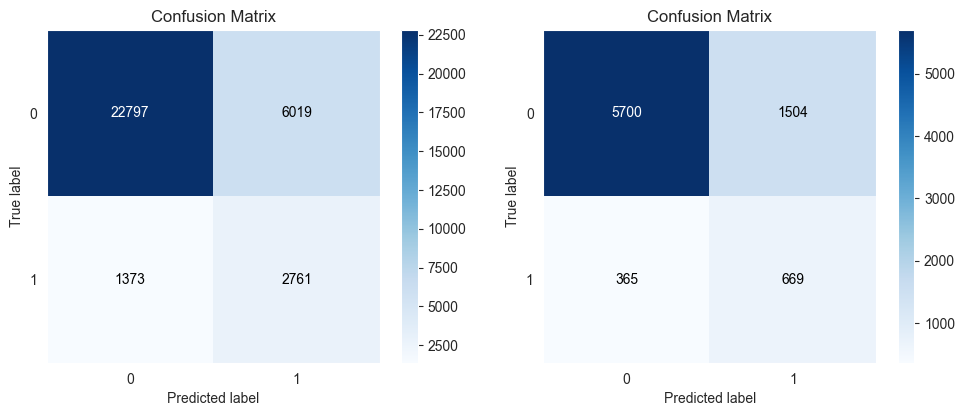

,Accuracy,Balanced Accuracy,F1 Score,Recall,Precision,Precision Weighted,AUC,PR AUC,Average Precision Score
Training,0.775660,0.729500,0.806179,0.667876,0.314465,0.864312,0.800591,0.461333,0.251693
Testing,0.773125,0.719115,0.803676,0.647002,0.307869,0.860499,0.777527,0.413574,0.243499


In [ ]:
train_metrics = {
    'Accuracy': acc_train,
    'Balanced Accuracy': balanced_acc_train,
    'F1 Score': f1_train,
    'Recall': recall_train,
    'Precision': precision_train,
    'Precision Weighted': precision_train_weighted,
    'AUC': roc_auc_train,
    'PR AUC': pr_auc_train,
    'Average Precision Score': average_precision_score_train
}

test_metrics = {
    'Accuracy': acc_test,
    'Balanced Accuracy': balanced_acc_test,
    'F1 Score': f1_test,
    'Recall': recall_test,
    'Precision': precision_test,
    'Precision Weighted': precision_test_weighted,
    'AUC': roc_auc_test,
    'PR AUC': pr_auc_test,
    'Average Precision Score': average_precision_score_test
}

train_df = pd.DataFrame(train_metrics, index=['Training'])
test_df = pd.DataFrame(test_metrics, index=['Testing'])

summary_table = pd.concat([train_df, test_df])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].set_title('Confusion Matrix - Train')
skplt.metrics.plot_confusion_matrix(y_train_full, y_pred_train, ax=axes[0])
axes[1].set_title('Confusion Matrix - Test')
skplt.metrics.plot_confusion_matrix(y_test_full, y_pred_test, ax=axes[1])

plt.tight_layout()
plt.show()

display(summary_table)

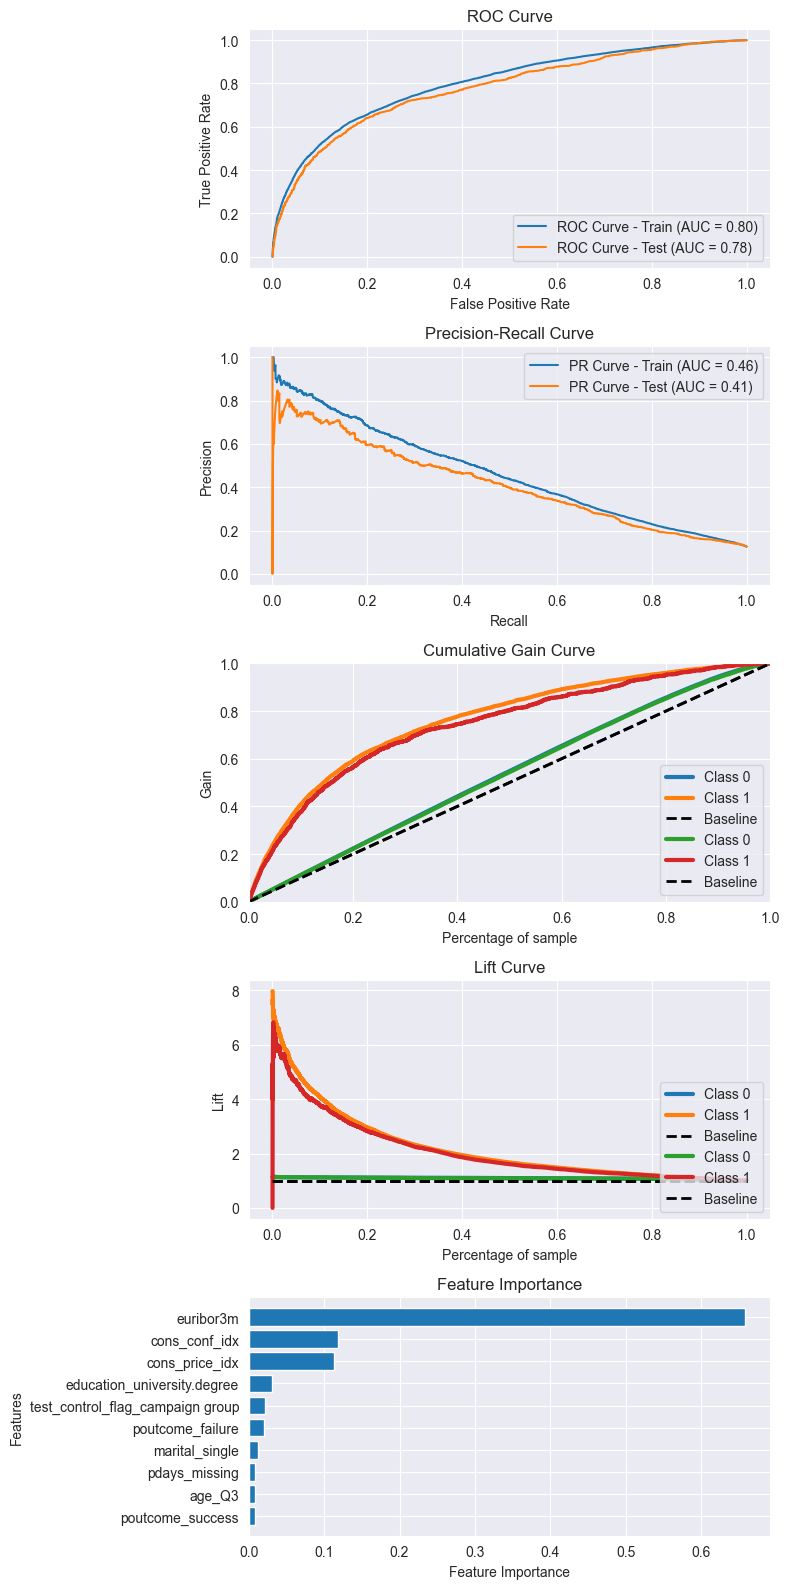

In [ ]:
#  ROC curve values for train and test
fpr_train, tpr_train, _ = roc_curve(y_train_full, y_prob_train[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test_full, y_prob_test[:, 1])

# Precision-Recall curve values for train and test
precision_train, recall_train, _ = precision_recall_curve(y_train_full, y_prob_train[:, 1])
precision_test, recall_test, _ = precision_recall_curve(y_test_full, y_prob_test[:, 1])


fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 16))

# ROC curve
axes[0].plot(fpr_train, tpr_train, label=f'ROC Curve - Train (AUC = {roc_auc_train:.2f})')
axes[0].plot(fpr_test, tpr_test, label=f'ROC Curve - Test (AUC = {roc_auc_test:.2f})')
axes[0].set_title('ROC Curve')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend()

# Precision-Recall curve
axes[1].plot(recall_train, precision_train, label=f'PR Curve - Train (AUC = {pr_auc_train:.2f})')
axes[1].plot(recall_test, precision_test, label=f'PR Curve - Test (AUC = {pr_auc_test:.2f})')
axes[1].set_title('Precision-Recall Curve')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].legend()

# Cumulative Gain curve
skplt.metrics.plot_cumulative_gain(y_train_full, y_prob_train, ax=axes[2])
skplt.metrics.plot_cumulative_gain(y_test_full, y_prob_test, ax=axes[2])
axes[2].set_title('Cumulative Gain Curve')

# Lift curve
skplt.metrics.plot_lift_curve(y_train_full, y_prob_train, ax=axes[3])
skplt.metrics.plot_lift_curve(y_test_full, y_prob_test, ax=axes[3])
axes[3].set_title('Lift Curve')

# Feature importance
sorted_idx = model.feature_importances_.argsort()
relative_importances = model.feature_importances_[sorted_idx] / model.feature_importances_.sum()
axes[4].barh(X_train_full_final.columns[sorted_idx], relative_importances)
axes[4].set_title('Feature Importance')
axes[4].set_xlabel('Feature Importance')
axes[4].set_ylabel('Features')


plt.tight_layout()
plt.show()

In [ ]:
lgb_exp = dx.Explainer(model, X_train_full_final, y_train_full)

Preparation of a new explainer is initiated

  -> data              : 32950 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 32950 values
  -> model_class       : lightgbm.sklearn.LGBMClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x00000221149A1D80> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.108, mean = 0.401, max = 0.976
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.973, mean = -0.275, max = 0.872
  -> model_info        : package lightgbm

A new explainer has been created!


In [ ]:
lgb_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 10/10 [00:01<00:00,  7.61it/s]


In [ ]:
lgb_exp.model_parts().plot()

## Campaign group modelling

In [ ]:
campaign_group = df_raw[df_raw['test_control_flag'] == 'campaign group']
control_group = df_raw[df_raw['test_control_flag'] == 'control group']

predictors_camp = campaign_group.columns.drop(['y', 'test_control_flag', 'client_id'])

X_camp = campaign_group[predictors_camp]
y_camp = campaign_group['y']

y_camp.replace({'yes': 1, 'no': 0}, inplace=True)

X_train_camp, X_test_camp, y_train_camp, y_test_camp = train_test_split(X_camp, y_camp, stratify=y_camp, test_size=0.2, random_state=123)

numeric_features = X_train_camp.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train_camp.select_dtypes(include=['object', 'category']).columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

X_train_camp = preprocessor.fit_transform(X_train_camp)
columns = numeric_features.tolist() + preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()
X_train_camp = pd.DataFrame(X_train_camp, columns=columns)

X_test_camp = preprocessor.transform(X_test_camp)
X_test_camp = pd.DataFrame(X_test_camp, columns=columns)

In [ ]:
scale_pos_weight = (y_train_camp.shape[0] - y_train_camp.sum()) / y_train_camp.sum()

FFS_LGBM_prec_camp = SequentialFeatureSelector(
    lgb.LGBMClassifier(objective='binary', scale_pos_weight=scale_pos_weight, n_jobs=-1, random_state=123),
    k_features=(1,12),
    forward=True,
    verbose=2,
    cv=3,
    scoring = 'average_precision',
    n_jobs=-1).fit(X_train_camp, y_train_camp)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   14.3s finished

[2024-06-06 02:02:24] Features: 1/12 -- score: 0.3277202044381832[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    6.7s finished

[2024-06-06 02:02:31] Features: 2/12 -- score: 0.4308251065785937[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    5.7s finished

[2024-06-06 02:02:37] Features: 3/12 -- score: 0.4465294288715018[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  67 o

In [ ]:
# list(FFS_LGBM_prec_camp.k_feature_names_)

In [ ]:
selected_features_camp_lgb = ['duration',
 'cons_conf_idx',
 'age_Q1',
 'marital_single',
 'education_university.degree',
 'loan_no',
 'contact_cellular',
 'pdays_Q2',
 'pdays_missing']

In [ ]:
X_train_camp_final = X_train_camp[selected_features_camp_lgb]
X_test_camp_final= X_test_camp[selected_features_camp_lgb]

In [ ]:
scale_pos_weight = (X_train_camp_final.shape[0] - y_train_camp.sum()) / y_train_camp.sum()

lgb_model = lgb.LGBMClassifier(objective='binary', scale_pos_weight=scale_pos_weight, random_state=123)

params = {
    'learning_rate': [0.02, 0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_child_weight': [1, 2, 3, 4, 5],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1, 10],
    'reg_lambda': [0, 0.1, 0.5, 1, 10],
    'n_estimators': [100, 250, 500, 750, 1000],
    'num_leaves': [20, 30, 40, 50, 60, 70, 80, 90, 100]
}

results = random_search(X_train_camp_final, y_train_camp, params, lgb_model, n_iter=60, n_splits=5, scoring='average_precision', seed=42)


best_params_camp = results['best_params']
best_score_camp = results['best_score']
cv_results = results['cv_results']

print(f"Best hyperparameters: {best_params_camp}")
print(f"Best score: {best_score_camp}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best hyperparameters: {'subsample': 0.7, 'reg_lambda': 10, 'reg_alpha': 10, 'num_leaves': 20, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.02, 'colsample_bytree': 0.7}
Best score: 0.4964113529726233


In [ ]:
best_params_camp = {'subsample': 0.7, 'reg_lambda': 10, 'reg_alpha': 10, 'num_leaves': 20, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.02, 'colsample_bytree': 0.7}

In [ ]:
model = lgb.LGBMClassifier(**best_params_camp, objective='binary', scale_pos_weight=scale_pos_weight, random_state=123)
model.fit(X_train_camp_final, y_train_camp)

# predictions on train set
y_pred_train = model.predict(X_train_camp_final)
y_prob_train = model.predict_proba(X_train_camp_final)

acc_train = accuracy_score(y_train_camp,y_pred_train)
balanced_acc_train = balanced_accuracy_score(y_train_camp,y_pred_train)
f1_train = f1_score(y_train_camp,y_pred_train, average='weighted')
recall_train = recall_score(y_train_camp,y_pred_train)
precision_train = precision_score(y_train_camp,y_pred_train)
precision_train_weighted = precision_score(y_train_camp,y_pred_train, average='weighted')
average_precision_score_train = average_precision_score(y_train_camp,y_pred_train)

roc_auc_train = roc_auc_score(y_train_camp, y_prob_train[:, 1])
pr_auc_train = average_precision_score(y_train_camp, y_prob_train[:, 1])

# predictions on test set
y_pred_test = model.predict(X_test_camp_final)
y_prob_test = model.predict_proba(X_test_camp_final)

acc_test = accuracy_score(y_test_camp,y_pred_test)
balanced_acc_test = balanced_accuracy_score(y_test_camp,y_pred_test)
f1_test = f1_score(y_test_camp,y_pred_test, average='weighted')
recall_test = recall_score(y_test_camp,y_pred_test)
precision_test = precision_score(y_test_camp,y_pred_test)
precision_test_weighted = precision_score(y_test_camp,y_pred_test, average='weighted')
average_precision_score_test = average_precision_score(y_test_camp,y_pred_test)

roc_auc_test = roc_auc_score(y_test_camp, y_prob_test[:, 1])
pr_auc_test = average_precision_score(y_test_camp, y_prob_test[:, 1])

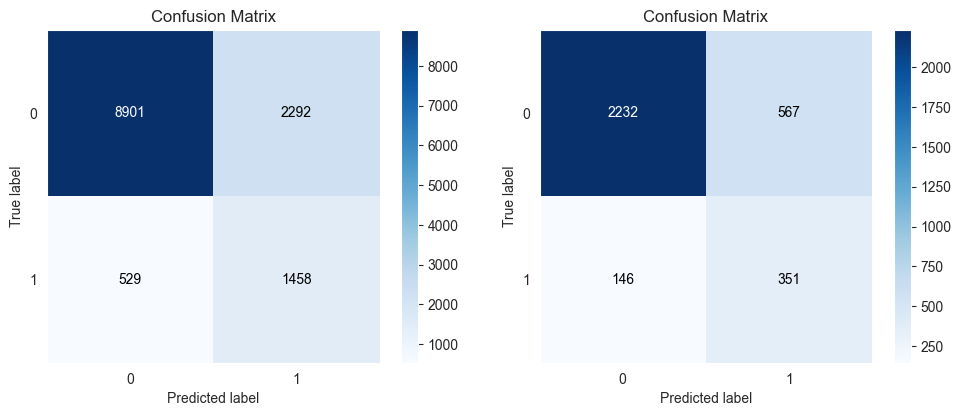

,Accuracy,Balanced Accuracy,F1 Score,Recall,Precision,Precision Weighted,AUC,PR AUC,Average Precision Score
Training,0.785964,0.764499,0.809702,0.733770,0.388800,0.860216,0.840469,0.536323,0.325426
Testing,0.783677,0.751833,0.807062,0.706237,0.382353,0.854727,0.827672,0.534618,0.314328


In [ ]:
train_metrics = {
    'Accuracy': acc_train,
    'Balanced Accuracy': balanced_acc_train,
    'F1 Score': f1_train,
    'Recall': recall_train,
    'Precision': precision_train,
    'Precision Weighted': precision_train_weighted,
    'AUC': roc_auc_train,
    'PR AUC': pr_auc_train,
    'Average Precision Score': average_precision_score_train
}

test_metrics = {
    'Accuracy': acc_test,
    'Balanced Accuracy': balanced_acc_test,
    'F1 Score': f1_test,
    'Recall': recall_test,
    'Precision': precision_test,
    'Precision Weighted': precision_test_weighted,
    'AUC': roc_auc_test,
    'PR AUC': pr_auc_test,
    'Average Precision Score': average_precision_score_test
}

train_df = pd.DataFrame(train_metrics, index=['Training'])
test_df = pd.DataFrame(test_metrics, index=['Testing'])

summary_table = pd.concat([train_df, test_df])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].set_title('Confusion Matrix - Train')
skplt.metrics.plot_confusion_matrix(y_train_camp, y_pred_train, ax=axes[0])
axes[1].set_title('Confusion Matrix - Test')
skplt.metrics.plot_confusion_matrix(y_test_camp, y_pred_test, ax=axes[1])

plt.tight_layout()
plt.show()

display(summary_table)

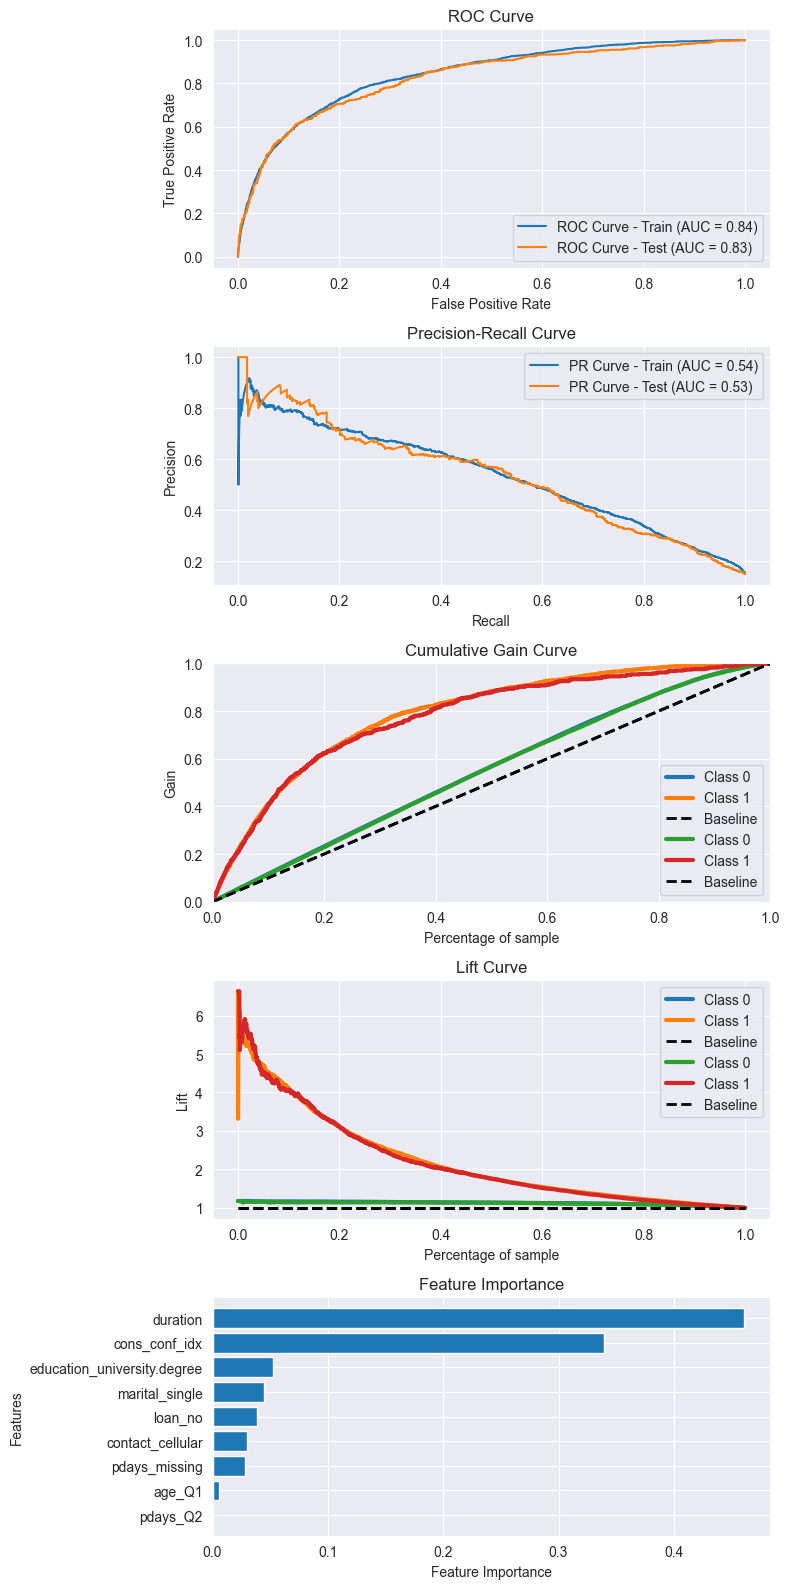

In [ ]:
#  ROC curve values for train and test
fpr_train, tpr_train, _ = roc_curve(y_train_camp, y_prob_train[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test_camp, y_prob_test[:, 1])

# Precision-Recall curve values for train and test
precision_train, recall_train, _ = precision_recall_curve(y_train_camp, y_prob_train[:, 1])
precision_test, recall_test, _ = precision_recall_curve(y_test_camp, y_prob_test[:, 1])


fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 16))

# ROC curve
axes[0].plot(fpr_train, tpr_train, label=f'ROC Curve - Train (AUC = {roc_auc_train:.2f})')
axes[0].plot(fpr_test, tpr_test, label=f'ROC Curve - Test (AUC = {roc_auc_test:.2f})')
axes[0].set_title('ROC Curve')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].legend()

# Precision-Recall curve
axes[1].plot(recall_train, precision_train, label=f'PR Curve - Train (AUC = {pr_auc_train:.2f})')
axes[1].plot(recall_test, precision_test, label=f'PR Curve - Test (AUC = {pr_auc_test:.2f})')
axes[1].set_title('Precision-Recall Curve')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].legend()

# Cumulative Gain curve
skplt.metrics.plot_cumulative_gain(y_train_camp, y_prob_train, ax=axes[2])
axes[2].legend()
skplt.metrics.plot_cumulative_gain(y_test_camp, y_prob_test, ax=axes[2])
axes[2].legend()
axes[2].set_title('Cumulative Gain Curve')
axes[2].legend()

# Lift curve
skplt.metrics.plot_lift_curve(y_train_camp, y_prob_train, ax=axes[3])
skplt.metrics.plot_lift_curve(y_test_camp, y_prob_test, ax=axes[3])
axes[3].set_title('Lift Curve')
axes[3].legend()

# Feature importance
sorted_idx = model.feature_importances_.argsort()
relative_importances = model.feature_importances_[sorted_idx] / model.feature_importances_.sum()
axes[4].barh(X_train_camp_final.columns[sorted_idx], relative_importances)
axes[4].set_title('Feature Importance')
axes[4].set_xlabel('Feature Importance')
axes[4].set_ylabel('Features')


plt.tight_layout()
plt.show()

In [ ]:
lgb_exp = dx.Explainer(model, X_train_camp_final, y_train_camp)

Preparation of a new explainer is initiated

  -> data              : 13180 rows 9 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 13180 values
  -> model_class       : lightgbm.sklearn.LGBMClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x00000221149A1D80> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0377, mean = 0.386, max = 0.966
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.965, mean = -0.235, max = 0.92
  -> model_info        : package lightgbm

A new explainer has been created!


In [ ]:
lgb_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 9/9 [00:01<00:00,  4.89it/s]


In [ ]:
lgb_exp.model_parts().plot()